#EC9630 Machine Learning - Laboratory 5

Task : UNSUPERVISED LEARNING

Name : S.KAMSAYINI

Reg No : 2020/E/185

Date : 09 AUG 2024

Time : 8am - 11am


In [123]:
# Required Libraries
import pandas as pd                      # For data manipulation
import numpy as np                       # For numerical operations
import matplotlib.pyplot as plt          # For visualizations
import seaborn as sns                    # For enhanced visualizations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler      # For scaling features
from sklearn.cluster import KMeans                 # For K-means clustering
from sklearn.mixture import GaussianMixture         # For Gaussian Mixture Model
from sklearn.metrics import silhouette_score        # For evaluating clustering performance

In [124]:
pip install ucimlrepo

Download the ‘Online Shoppers Purchasing Intention Dataset’ data from the UCI machine
learning data repository.


In [125]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)


In [126]:
# metadata
print(online_shoppers_purchasing_intention_dataset.metadata)



{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'title': 'Real-time prediction of online shoppers’ purchasing intention using multi

In [127]:
# variable information
print(online_shoppers_purchasing_intention_dataset.variables)

                       name     role         type demographic description  \
0            Administrative  Feature      Integer        None        None   
1   Administrative_Duration  Feature      Integer        None        None   
2             Informational  Feature      Integer        None        None   
3    Informational_Duration  Feature      Integer        None        None   
4            ProductRelated  Feature      Integer        None        None   
5   ProductRelated_Duration  Feature   Continuous        None        None   
6               BounceRates  Feature   Continuous        None        None   
7                 ExitRates  Feature   Continuous        None        None   
8                PageValues  Feature      Integer        None        None   
9                SpecialDay  Feature      Integer        None        None   
10                    Month  Feature  Categorical        None        None   
11         OperatingSystems  Feature      Integer        None        None   

#2. Read the data as a CSV file.

In [128]:
import pandas as pd
#Import Dataset
df = pd.read_csv('online_shoppers_intention.csv')

#3. Do exploratory data analysis and necessary data preprocessing steps such as handling missing values, encoding categorical variables, and scaling numerical features.

In [129]:
# Check for missing values
print(df.isnull().sum())


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [130]:
df.shape

(12330, 18)

In [131]:
df.sample(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
7778,3,89.666667,0,0.0,15,2022.117778,0.011765,0.023529,11.553997,0.0,Sep,3,2,3,1,Returning_Visitor,False,False
9885,2,77.700000,1,2.0,24,551.158333,0.004167,0.054444,7.945368,0.0,Dec,2,2,9,2,Returning_Visitor,False,False
12250,1,41.125000,0,0.0,126,4310.004668,0.000688,0.012823,3.451072,0.0,Nov,2,2,2,2,Returning_Visitor,False,False
11747,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Nov,1,1,3,3,Returning_Visitor,False,False
8204,2,98.750000,0,0.0,24,683.165385,0.000000,0.011111,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
11017,0,0.000000,0,0.0,8,1231.791667,0.082500,0.080556,0.000000,0.0,Dec,3,2,1,3,Returning_Visitor,False,False
10148,0,0.000000,0,0.0,23,901.266667,0.000000,0.017391,0.000000,0.0,Dec,1,1,1,2,New_Visitor,True,False
1720,0,0.000000,0,0.0,6,1251.000000,0.033333,0.066667,0.000000,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
9999,4,142.500000,0,0.0,56,1885.337440,0.010714,0.038102,5.040168,0.0,Nov,2,5,3,11,Returning_Visitor,False,True
6310,9,103.933333,0,0.0,16,172.133333,0.012000,0.049000,0.000000,0.0,Oct,1,1,1,2,Returning_Visitor,False,True


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [133]:
print(df['Revenue'].value_counts())
print()
print(df['Revenue'].value_counts(normalize=True))

Revenue
False    10422
True      1908
Name: count, dtype: int64

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64


In [ ]:
1908/12330 * 100

15.474452554744525

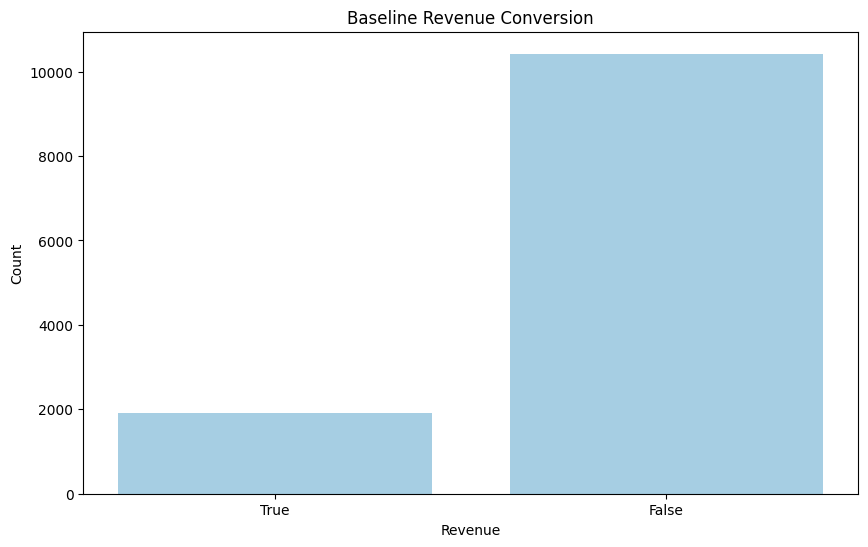

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the dataframe 'df' with the 'Revenue' feature

# Count the number of true and false values in the 'Revenue' feature
revenue_true_count = len(df[df['Revenue'] == True])
revenue_false_count = len(df[df['Revenue'] == False])

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(['True', 'False'], [revenue_true_count, revenue_false_count])

# Set the y-axis ticks with appropriate formatting
y_ticks = [0, 2000, 4000, 6000, 8000, 10000]
plt.yticks(y_ticks, [f'{y:.0f}' for y in y_ticks])

# Set the x-axis label
plt.xlabel('Revenue')

# Set the y-axis label
plt.ylabel('Count')

# Set the title
plt.title('Baseline Revenue Conversion')

# Show the plot
plt.show()

In [135]:
#calculation exact number of each visitor type
print(df['VisitorType'].value_counts())
print()
print(df['VisitorType'].value_counts(normalize=True))

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

VisitorType
Returning_Visitor    0.855718
New_Visitor          0.137388
Other                0.006894
Name: proportion, dtype: float64


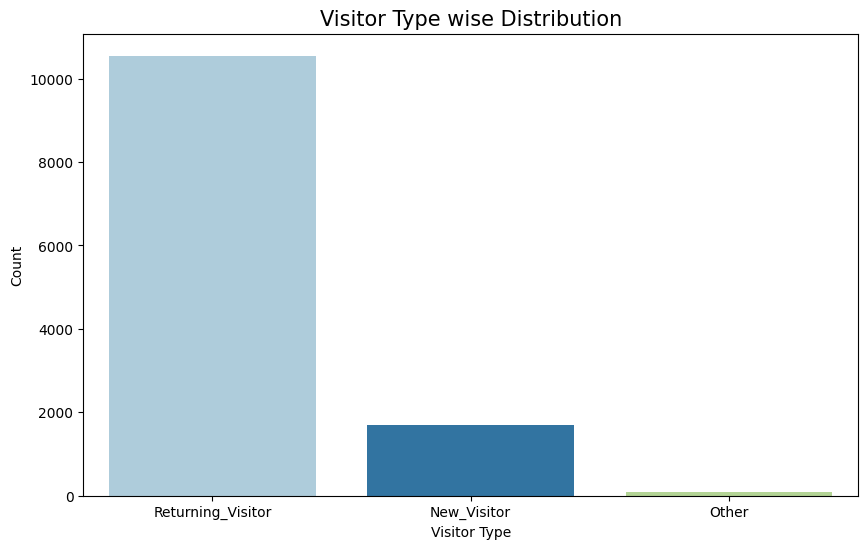

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the dataframe 'df' and the column name 'VisitorType'
customPalette = sns.color_palette("Paired", n_colors=len(df['VisitorType'].unique()))

plt.figure(figsize=(10, 6))
sns.countplot(x='VisitorType', data=df, palette=customPalette, hue='VisitorType', legend=False)

plt.title('Visitor Type wise Distribution', fontsize=15)
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.show()

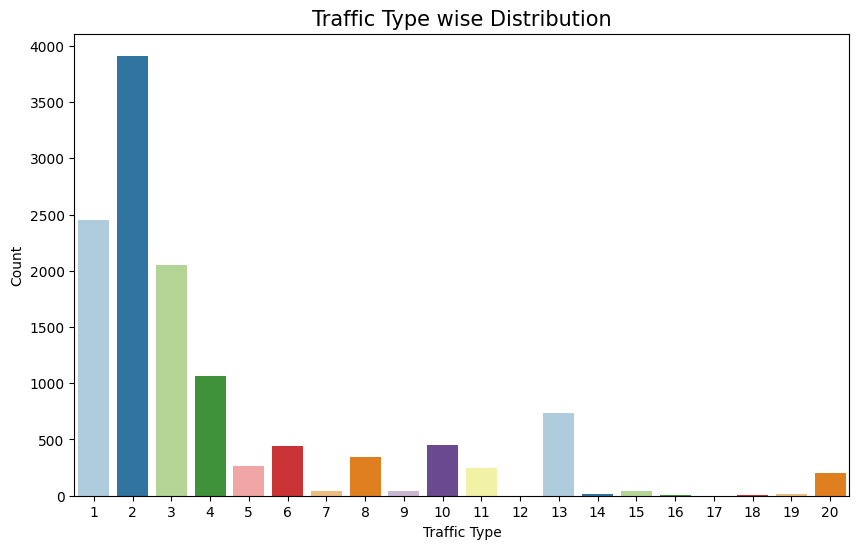

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the dataframe 'df' and the column name 'TrafficType'
customPalette = sns.color_palette("Paired", n_colors=len(df['TrafficType'].unique()))

plt.figure(figsize=(10, 6))
sns.countplot(x='TrafficType', data=df, palette=customPalette, hue='TrafficType', legend=False)

plt.title('Traffic Type wise Distribution', fontsize=15)
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.show()

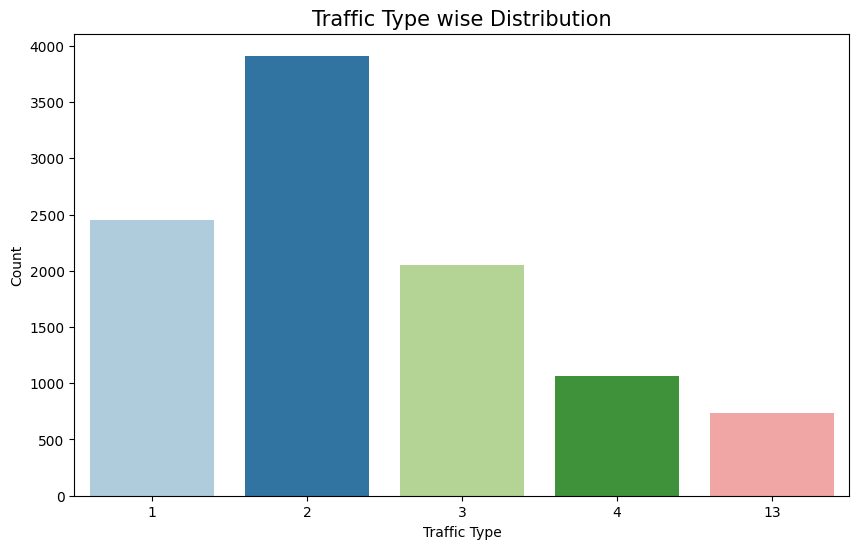

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the dataframe 'df' and the column name 'TrafficType'
top_traffic_types = df['TrafficType'].value_counts().head(5).index

customPalette = sns.color_palette("Paired", n_colors=len(top_traffic_types))

plt.figure(figsize=(10, 6))
sns.countplot(x='TrafficType', data=df[df['TrafficType'].isin(top_traffic_types)], palette=customPalette, hue='TrafficType', legend=False)

plt.title('Traffic Type wise Distribution', fontsize=15)
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.show()

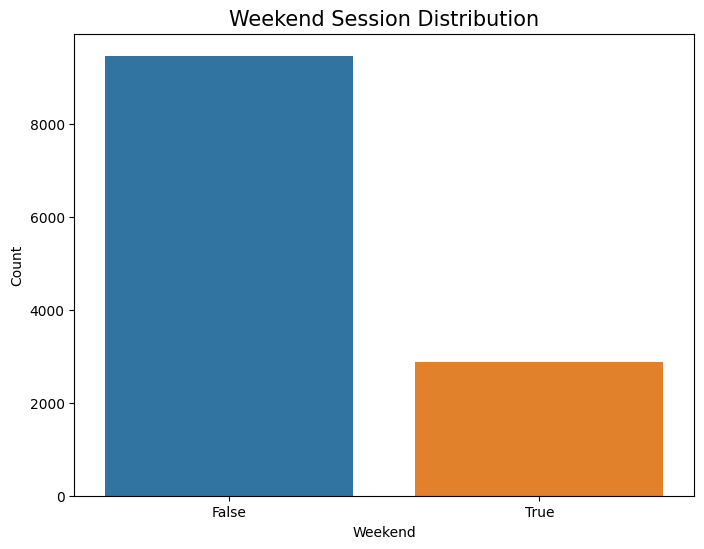

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the dataframe 'df' and the column name 'Weekend'
weekend_counts = df['Weekend'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=weekend_counts.index, y=weekend_counts.values, palette=["#1f77b4", "#ff7f0e"], hue=weekend_counts.index, legend=False)

plt.title('Weekend Session Distribution', fontsize=15)
plt.xlabel('Weekend')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'])
plt.show()

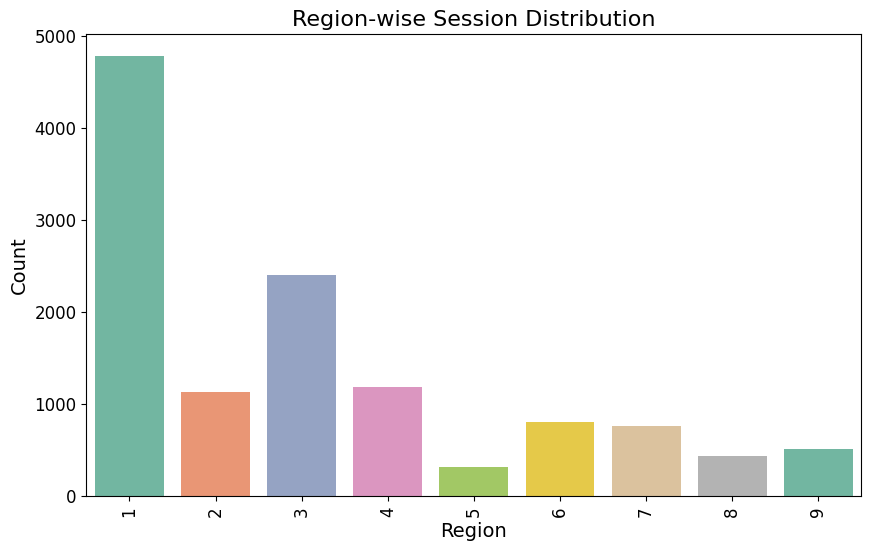

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the dataframe 'df' and the column name 'Region'
region_counts = df['Region'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="Set2", hue=region_counts.index, legend=False)

plt.title('Region-wise Session Distribution', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

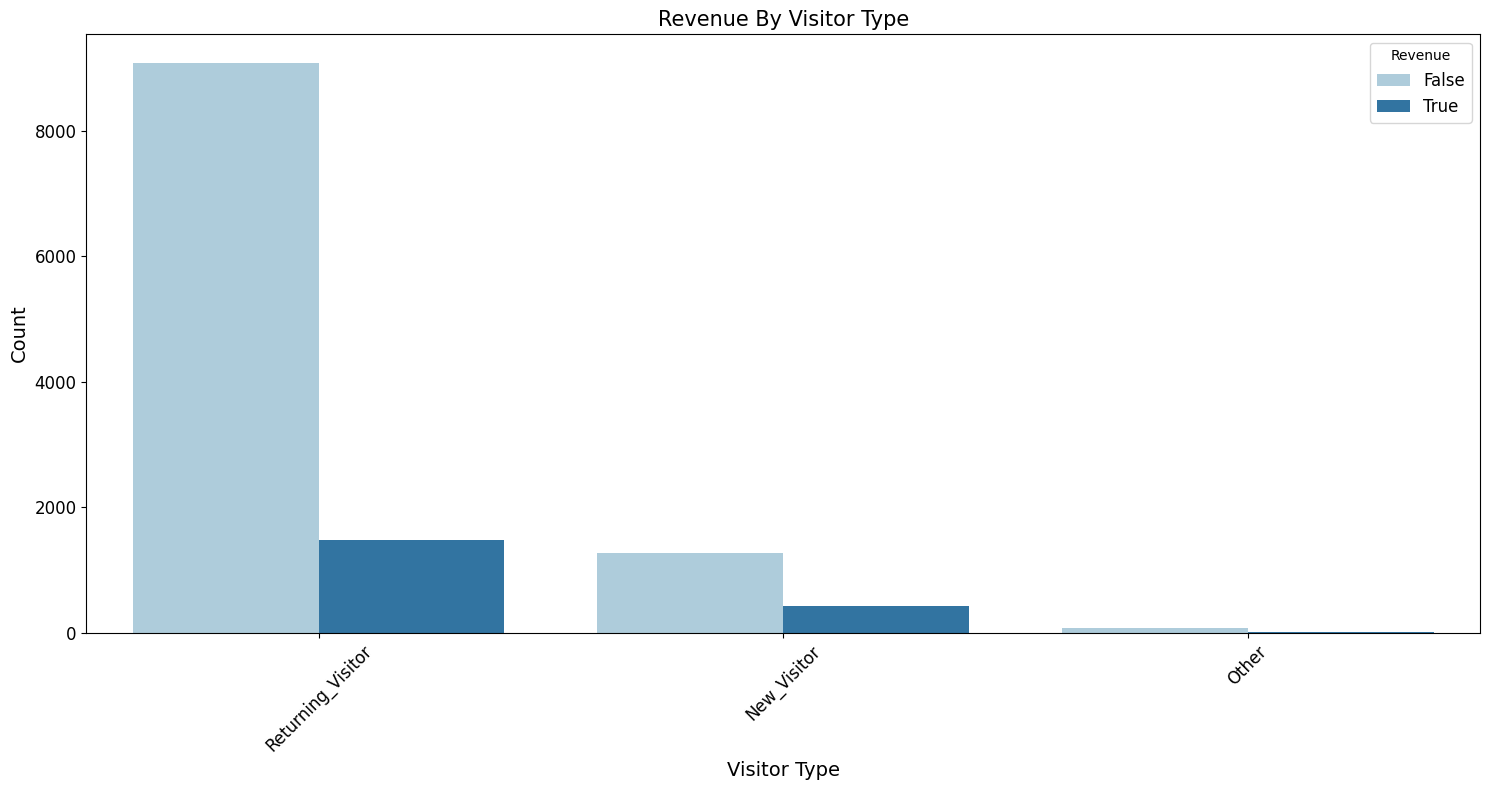

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a custom color palette defined as 'customPalette'
sns.set_palette(customPalette)

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="VisitorType", hue="Revenue", data=df, palette=customPalette[:2], ax=ax)

plt.title('Revenue By Visitor Type', fontsize=15)
plt.xlabel('Visitor Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Revenue', fontsize=12)

plt.tight_layout()
plt.show()

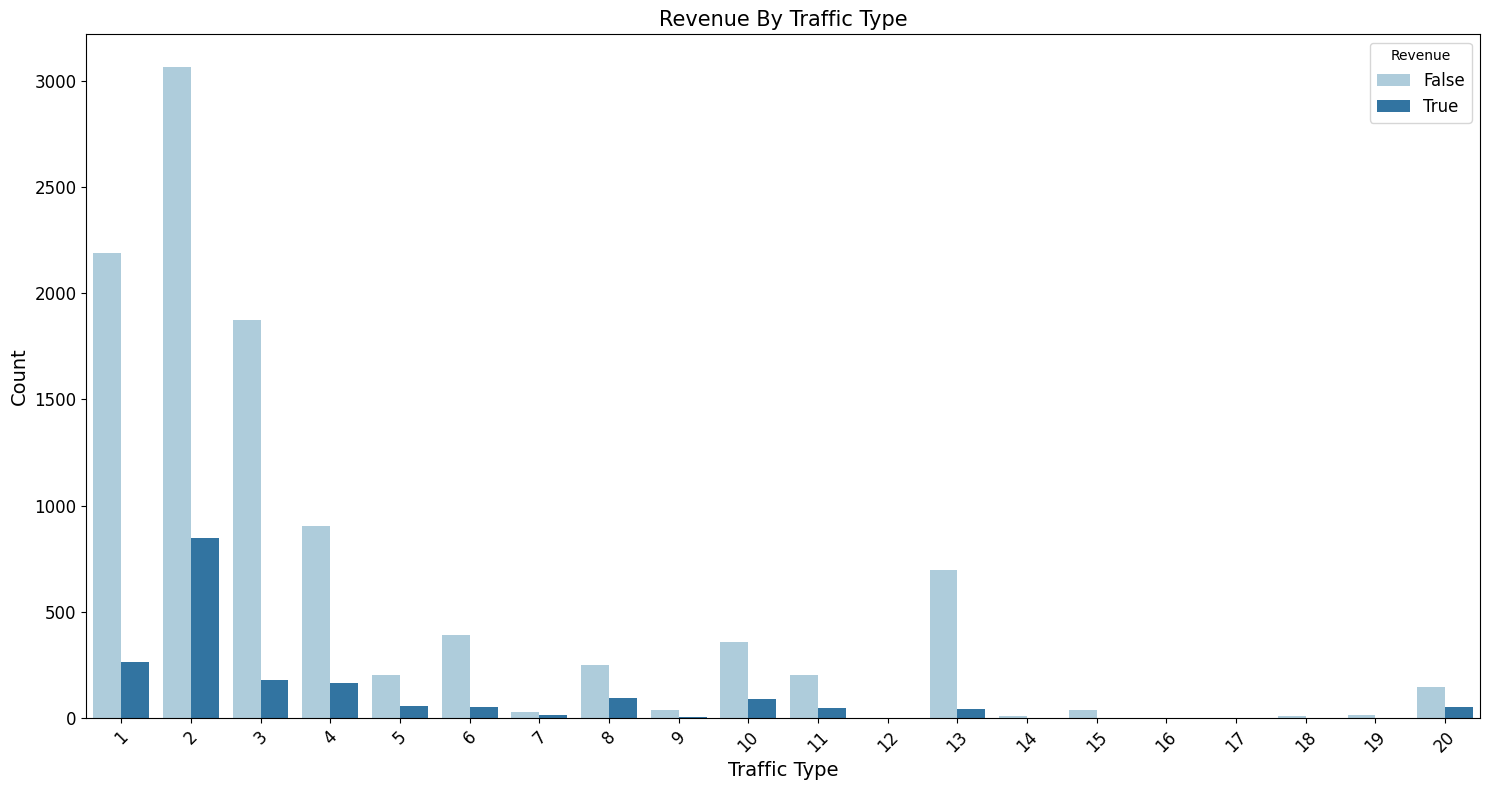

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a custom color palette defined as 'customPalette'
sns.set_palette(customPalette[:2])

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="TrafficType", hue="Revenue", data=df, palette=customPalette[:2])

plt.title('Revenue By Traffic Type', fontsize=15)
plt.xlabel('Traffic Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Revenue', loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

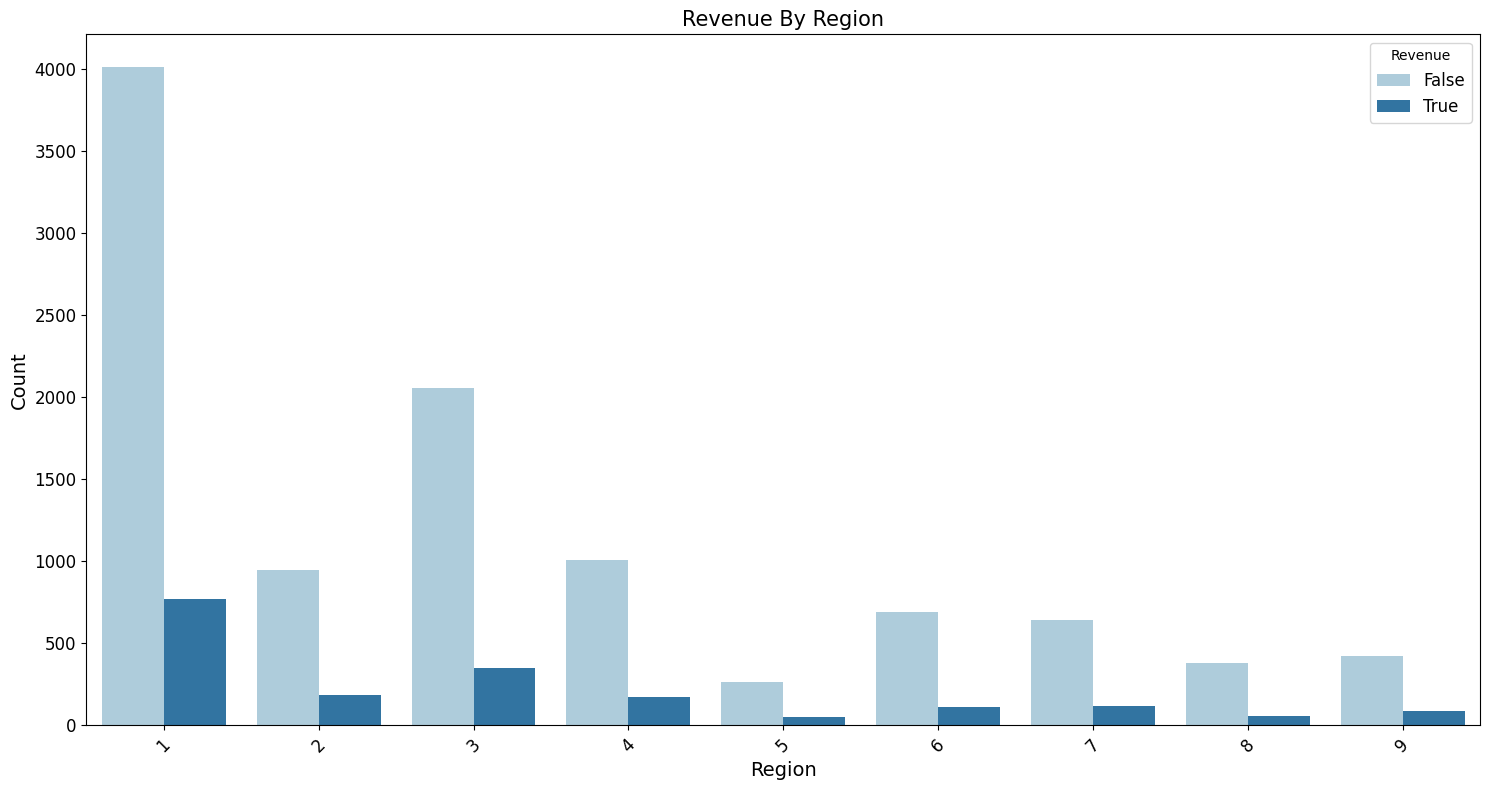

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a custom color palette defined as 'customPalette'
sns.set_palette(customPalette[:2])

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="Region", hue="Revenue", data=df, palette=customPalette[:2])

plt.title('Revenue By Region', fontsize=15)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Revenue', loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

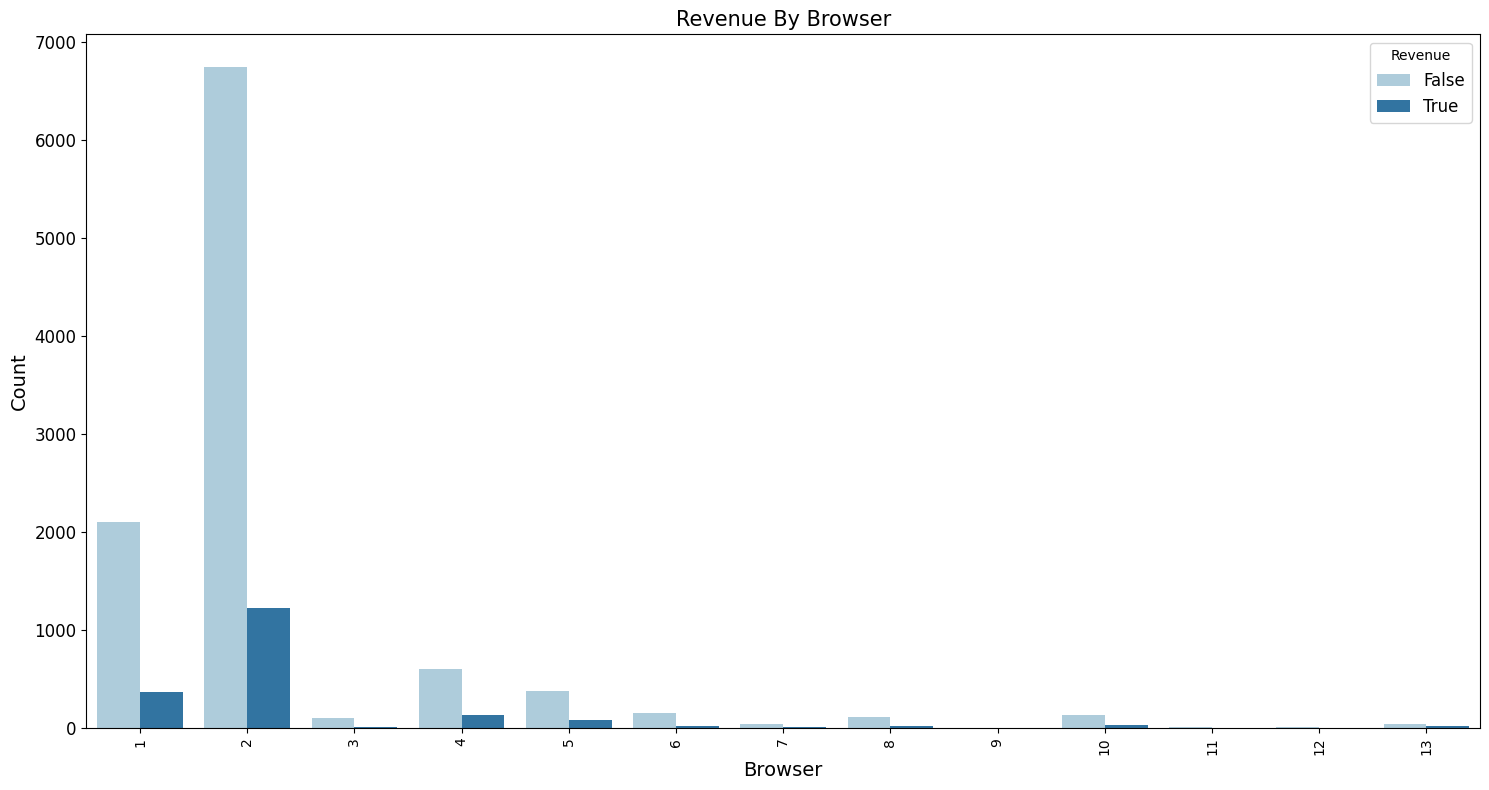

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a custom color palette defined as 'customPalette'
sns.set_palette(customPalette[:2])

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="Browser", hue="Revenue", data=df, palette=customPalette[:2])

plt.title('Revenue By Browser', fontsize=15)
plt.xlabel('Browser', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.legend(title='Revenue', loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

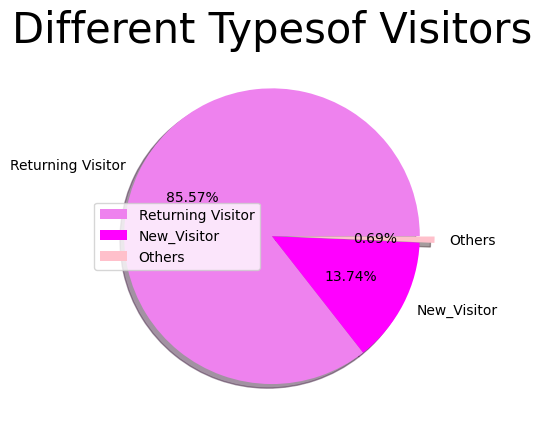

In [23]:
# plotting a pie chart for browsers

size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Typesof Visitors', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [24]:
# checking different no. of browsers they use for shopping

df['Browser'].value_counts()

,count
Browser,
2,7961
1,2462
4,736
5,467
6,174
10,163
8,135
3,105
13,61


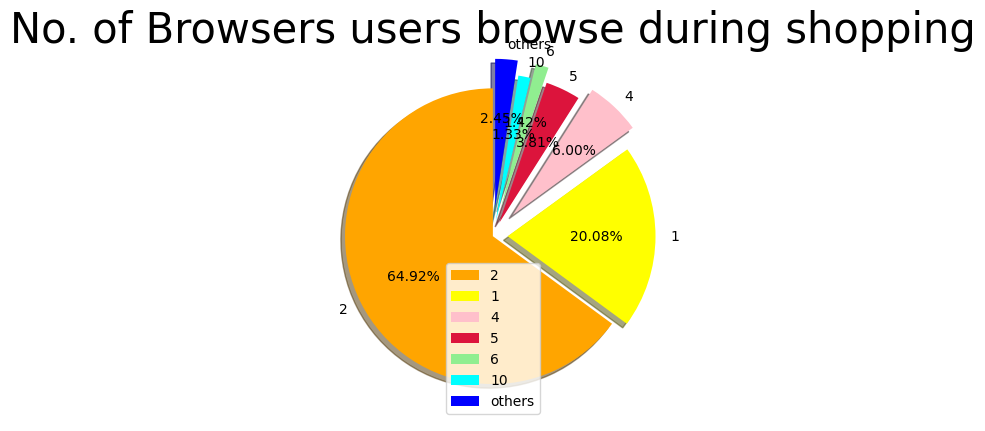

In [25]:
# plotting a pie chart for browsers

size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"
explode = [0, 0.1, 0.2, 0.1, 0.2, 0.1, 0.2]

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('No. of Browsers users browse during shopping', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

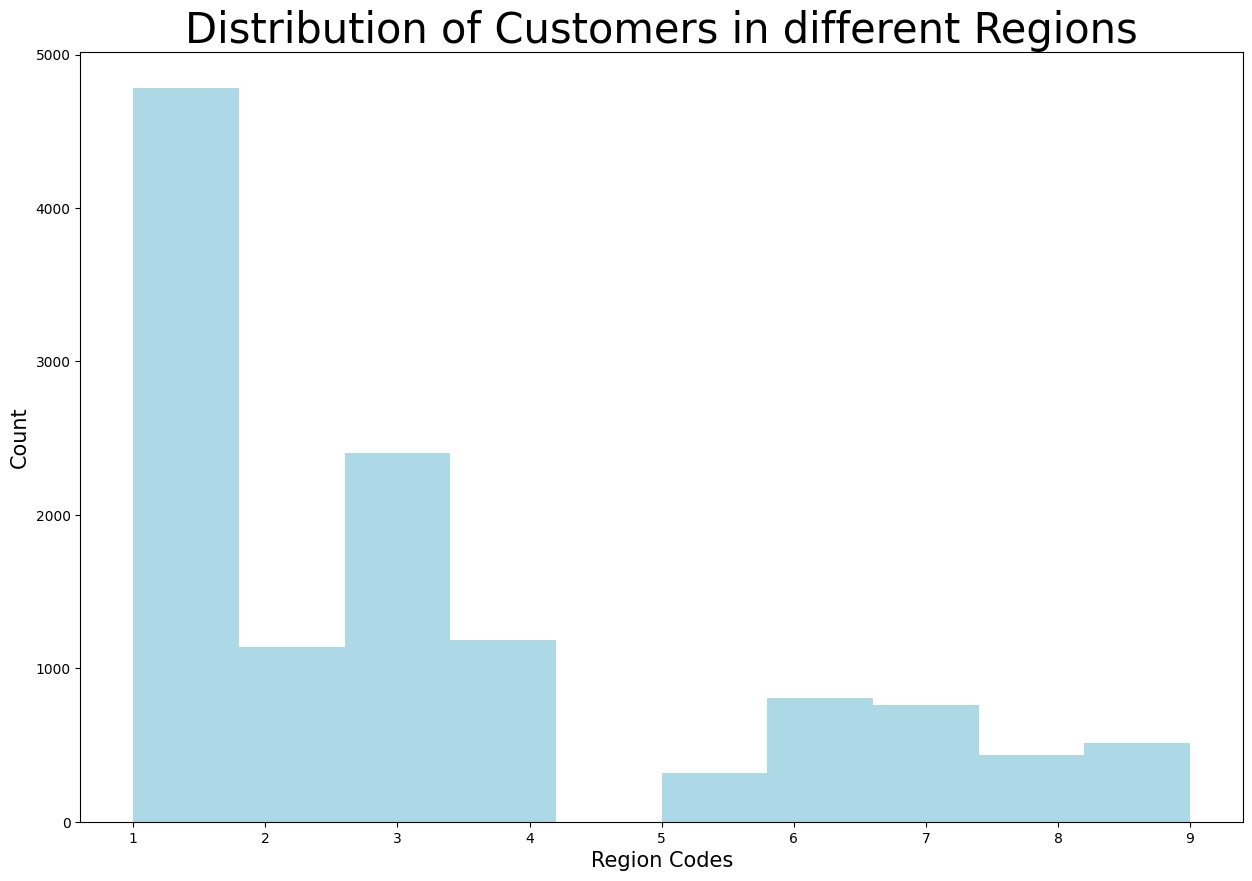

In [26]:

# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (15, 10)
plt.hist(df['Region'], color = 'lightblue')
plt.title('Distribution of Customers in different Regions',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

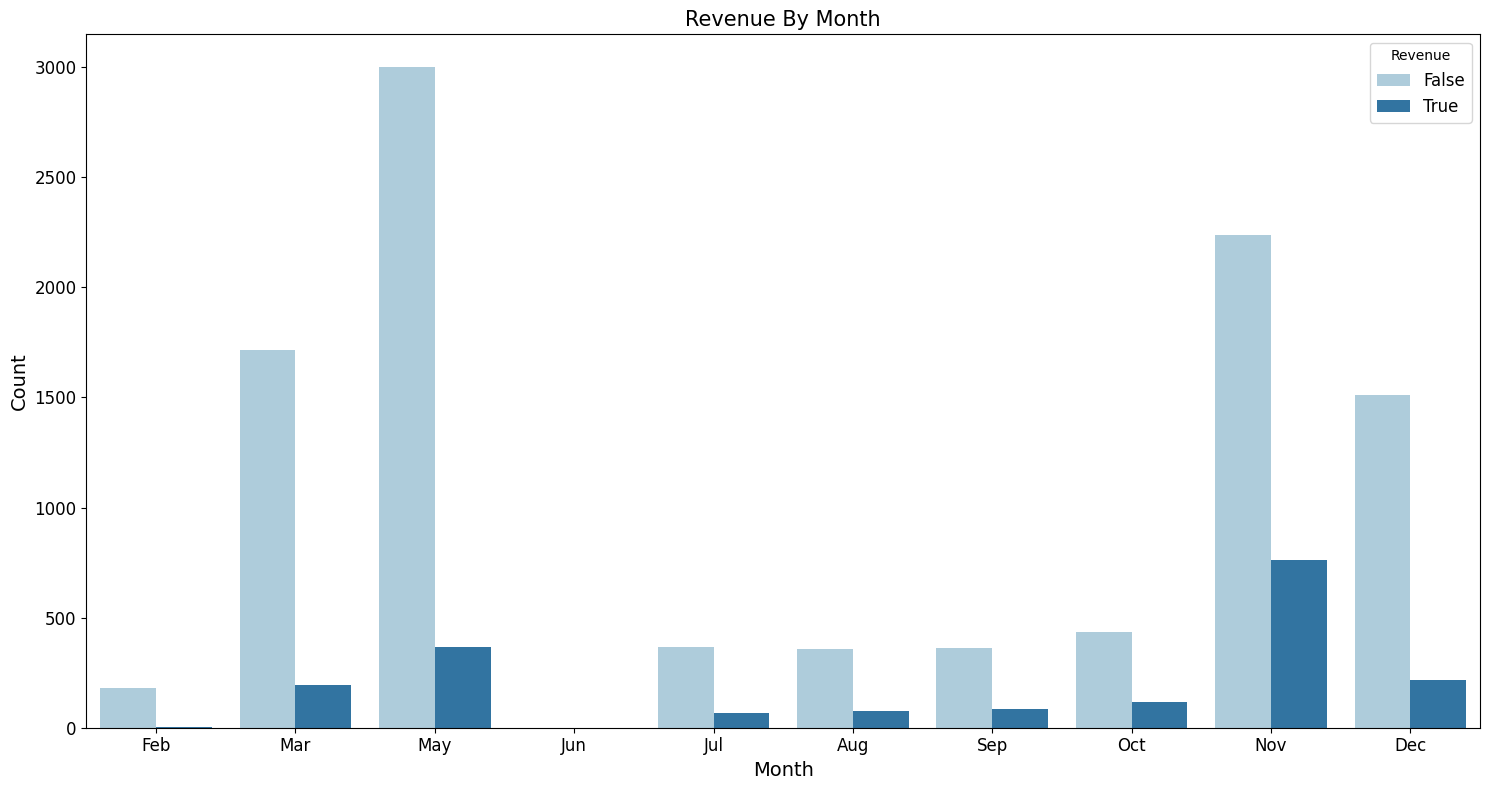

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a custom color palette defined as 'customPalette'
sns.set_palette(customPalette[:2])

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="Month", hue="Revenue", data=df, order=['Feb', 'Mar', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], palette=customPalette[:2])

plt.title('Revenue By Month', fontsize=15)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Revenue', loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

In [28]:

# checking the no. of OSes each user is having

df['OperatingSystems'].value_counts()

,count
OperatingSystems,
2,6601
1,2585
3,2555
4,478
8,79
6,19
7,7
5,6


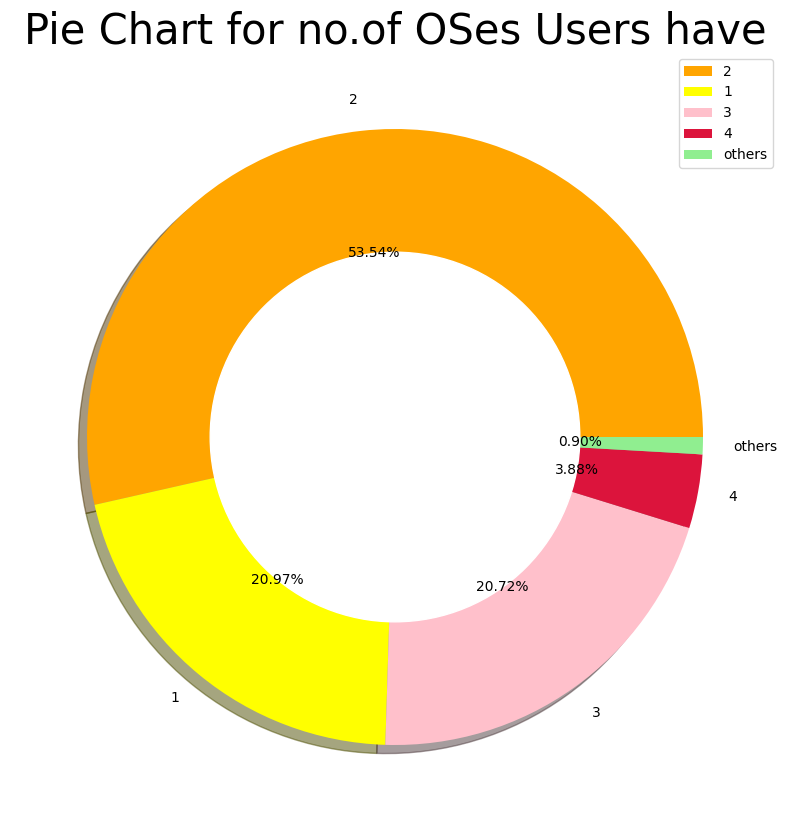

In [29]:

# creating a donut chart for the months variations'

# plotting a pie chart for different number of OSes users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Pie Chart for no.of OSes Users have', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()


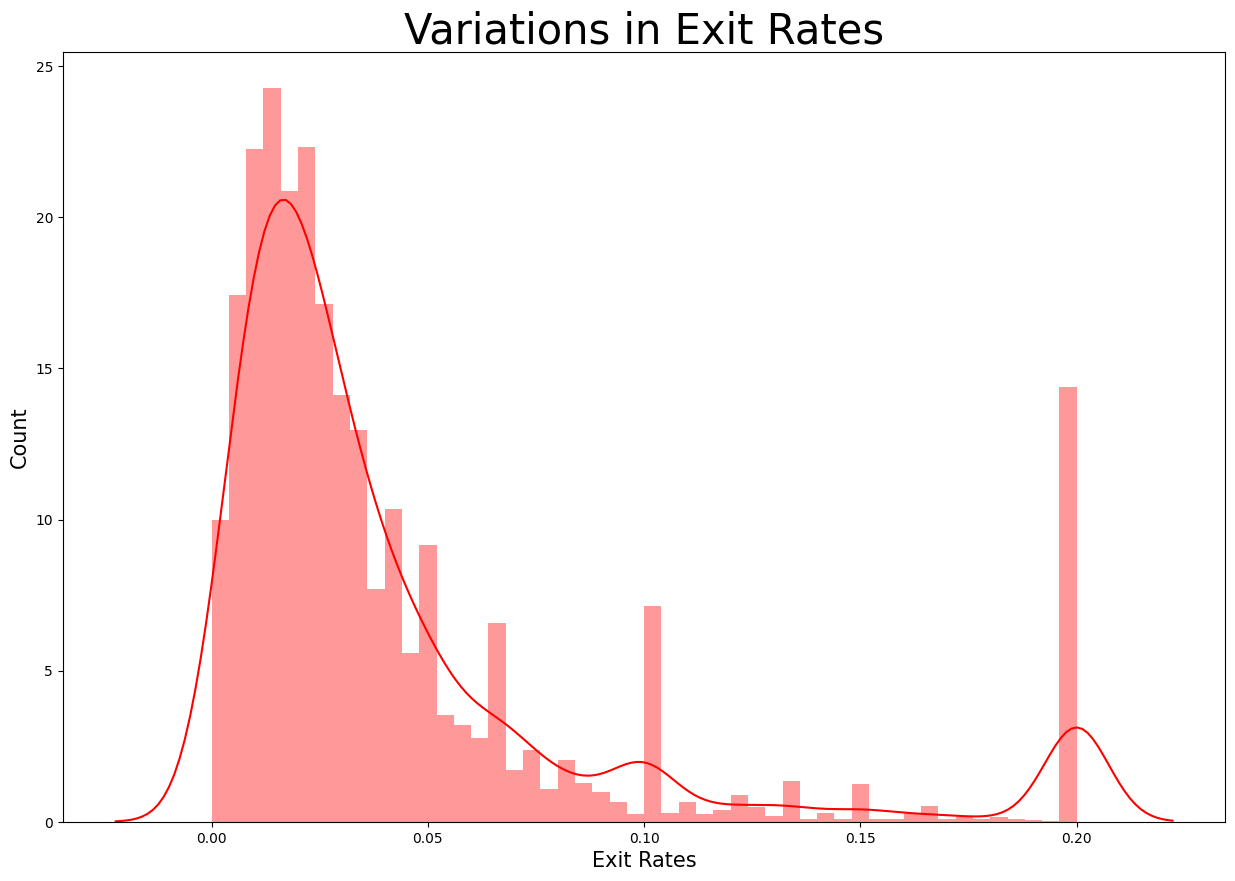

In [30]:
import warnings
warnings.filterwarnings("ignore")


# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(df['ExitRates'], color = 'red')
plt.title('Variations in Exit Rates', fontsize = 30)
plt.xlabel('Exit Rates', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()


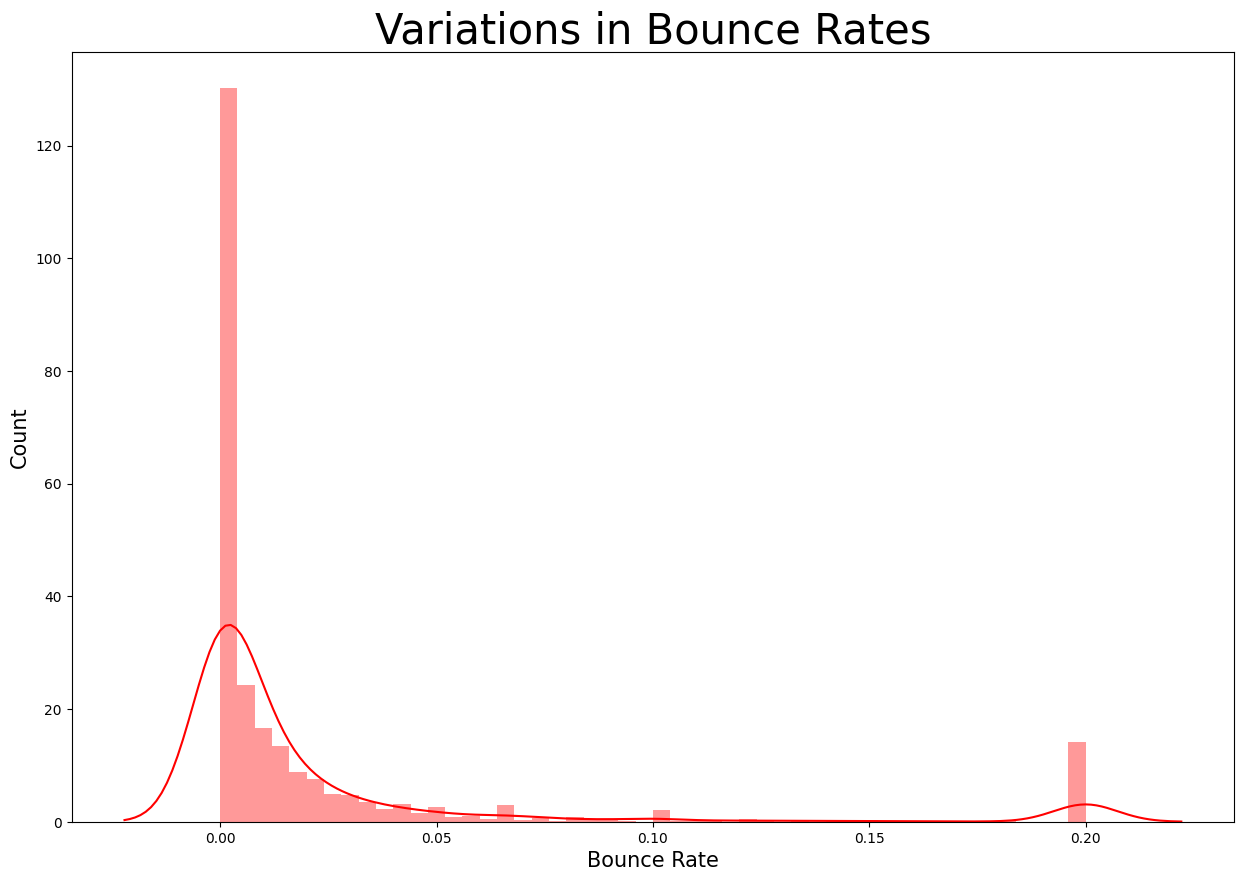

In [31]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(df['BounceRates'], color = 'red')
plt.title('Variations in Bounce Rates', fontsize = 30)
plt.xlabel('Bounce Rate', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()


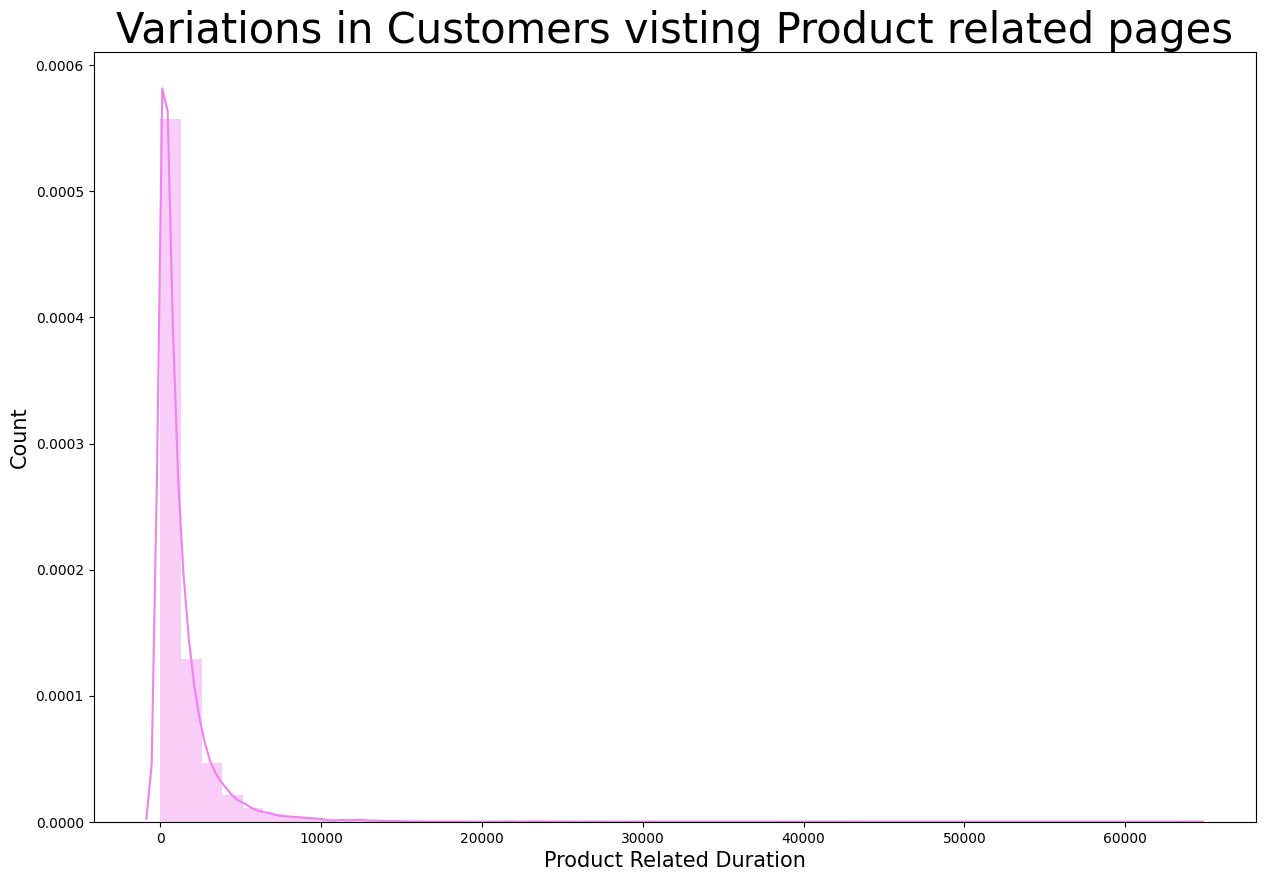

In [32]:

# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(df['ProductRelated_Duration'], color = 'violet')
plt.title('Variations in Customers visting Product related pages', fontsize = 30)
plt.xlabel('Product Related Duration', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()


Text(0.5, 1.0, 'Exit and Bounce Rates')

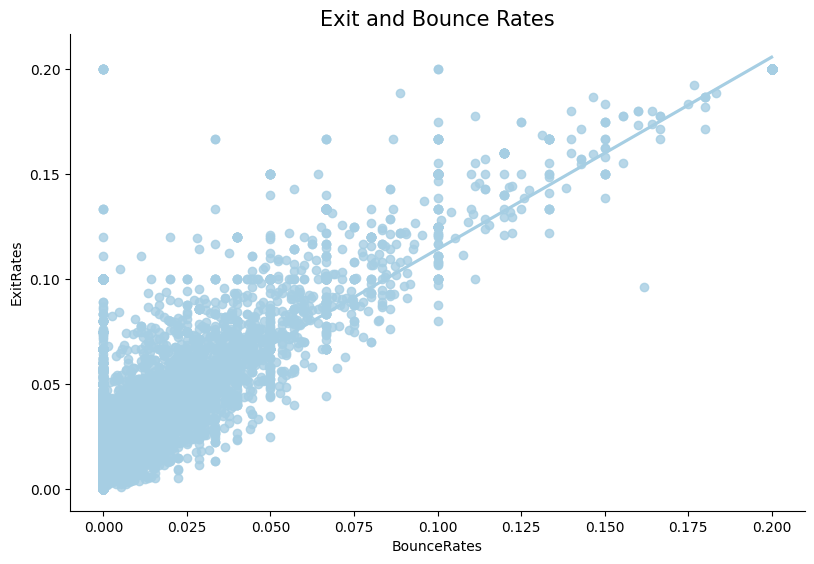

In [ ]:
ax = sns.lmplot(x="BounceRates", y="ExitRates", data=df,height=5.5, aspect=1.5)
plt.title('Exit and Bounce Rates', fontsize = 15)

Text(0.5, 1.0, 'Bounce Rates and Page Values')

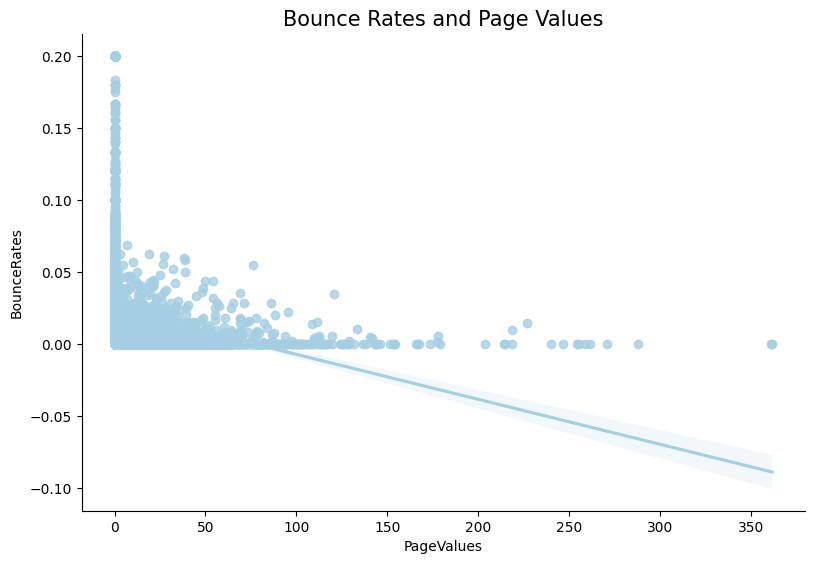

In [ ]:
ax = sns.lmplot(x="PageValues", y="BounceRates" , data=df,height=5.5, aspect=1.5)
plt.title('Bounce Rates and Page Values', fontsize = 15)

Text(0.5, 1.0, 'Exit Rates and Page Values')

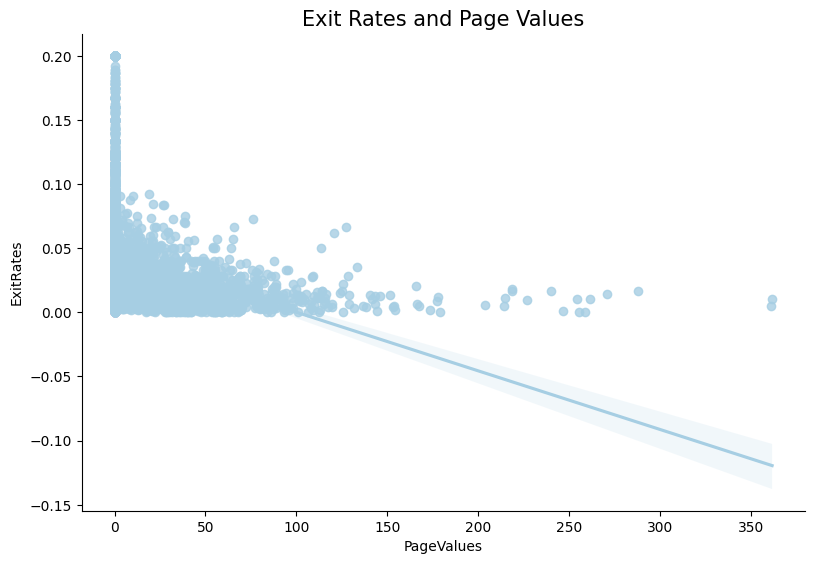

In [ ]:
ax = sns.lmplot(x="PageValues", y="ExitRates" , data=df,height=5.5, aspect=1.5)
plt.title('Exit Rates and Page Values', fontsize = 15)

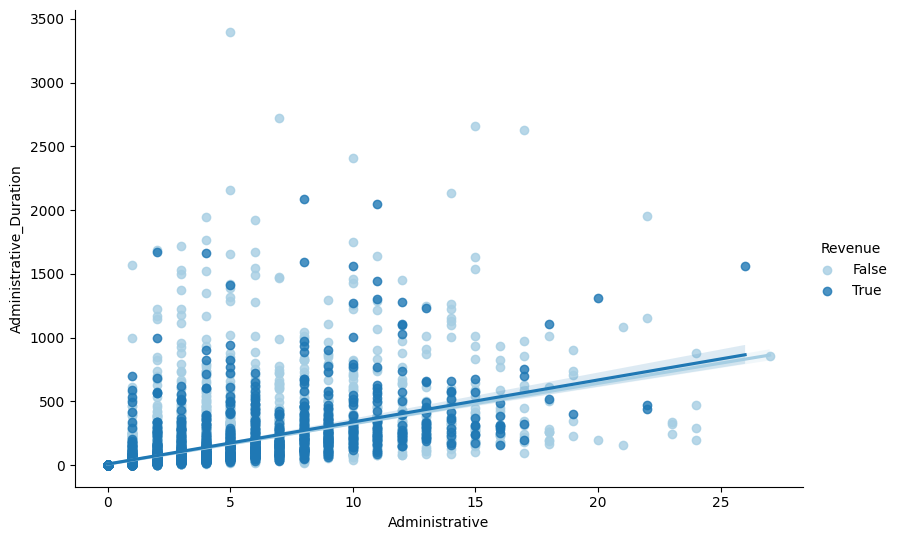

In [ ]:
ax = sns.lmplot(x="Administrative", y="Administrative_Duration",\
                hue='Revenue', data=df,height=5.5, aspect=1.5)

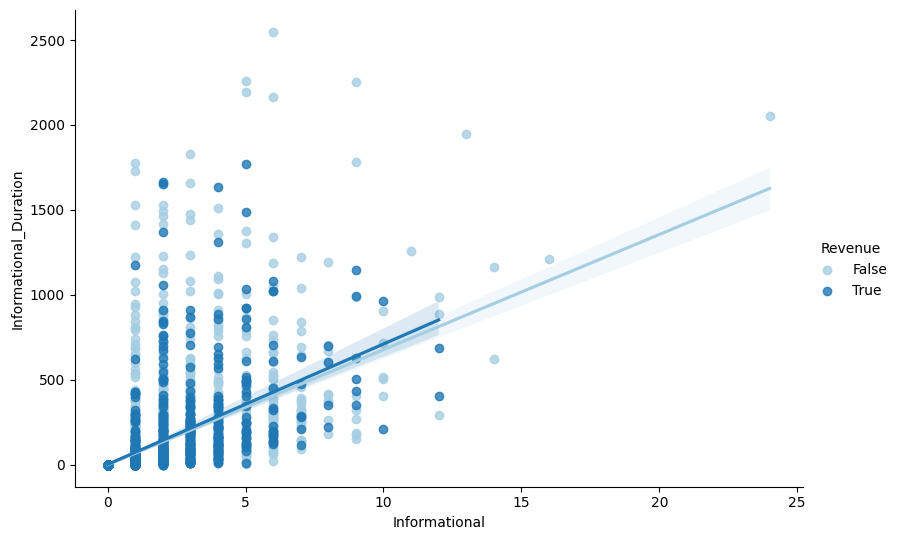

In [ ]:
ax = sns.lmplot(x="Informational", y="Informational_Duration",\
                hue='Revenue', data=df,height=5.5, aspect=1.5)

In [136]:
#Convert Revenue Dtype to String

df_new = df.copy()                                               # Create copy of pandas DataFrame
df_new['Revenue'] = df_new['Revenue'].map({True: 'True', False: 'False'})  # Replace boolean by string


In [137]:
df_new['Weekend'] = df_new['Weekend'].map({True: 'True', False: 'False'})

In [138]:
df_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [139]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [140]:
#Select only the numerical features

numerical_features = [col for col in df_new.columns \
                      if np.issubdtype(df_new[col].dtype, np.number)]
print(numerical_features)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


In [141]:
df_new[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


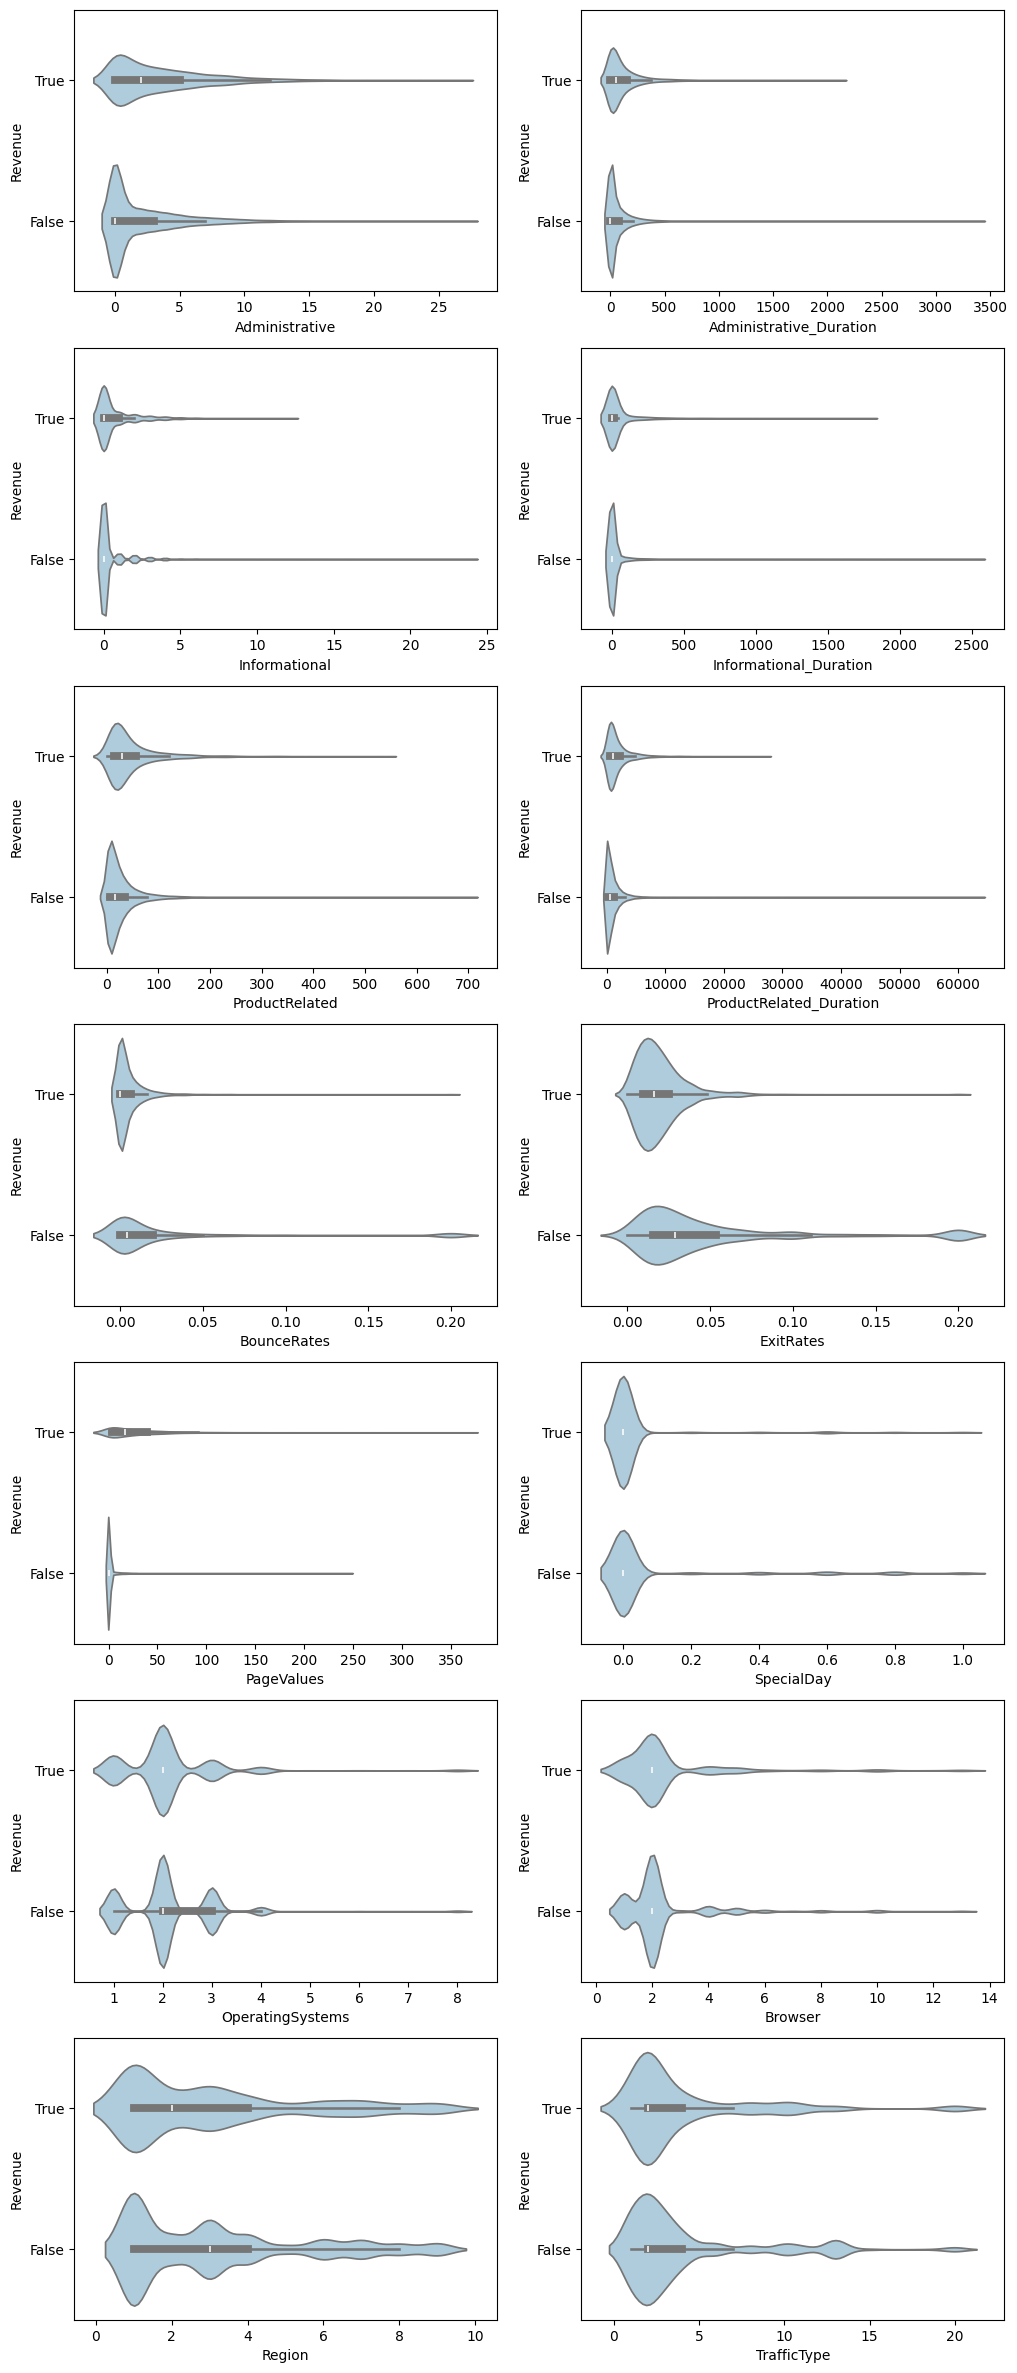

In [38]:
# create violin plots for Visits with Revenue & No Revenue

plt.figure(figsize=(12,30))
for index, col in enumerate(numerical_features):
    plt.subplot(7, 2, index+1)
    sns.violinplot(x=col, y="Revenue", data=df_new, order=["True", "False"])

In [39]:
from scipy.stats import ttest_ind

# define function for computing mean of column for yes and no cases,
# as well as the test statistics and pvalue for equality of means test

def test_means(data, col):
    yes_mask = data["Revenue"] == "True"
    values_yes = data[col][yes_mask]
    values_no = data[col][~yes_mask]
    mean_yes = values_yes.mean()
    mean_no = values_no.mean()
    ttest_res = ttest_ind(values_yes, values_no)
    return [col, mean_yes, mean_no, \
            round(ttest_res[0], 4), round(ttest_res[1],4)]

In [40]:
# Run T Test to determine if there is statistical difference between Revenue & Non-Revenue Visits

# define pandas dataframe, in which values should be filled
test_df = pd.DataFrame(columns=["column", "mean yes", \
                                "mean no", "ttest stat", \
                                "ttest pval"])

# for each column in the numerical_features, compute means and test
# statistics and fill the values in the dataframe

for index, col in enumerate(numerical_features):
    test_df.loc[index] = test_means(df_new, col)
test_df

,column,mean yes,mean no,ttest stat,ttest pval
0,Administrative,3.393606,2.117732,15.5752,0.0000
1,Administrative_Duration,119.483244,73.740111,10.4369,0.0000
2,Informational,0.786164,0.451833,10.6185,0.0000
3,Informational_Duration,57.611427,30.236237,7.8299,0.0000
4,ProductRelated,48.210168,28.714642,17.8282,0.0000
5,ProductRelated_Duration,1876.209615,1069.987809,17.1180,0.0000
6,BounceRates,0.005117,0.025317,-16.9226,0.0000
7,ExitRates,0.019555,0.047378,-23.5008,0.0000
8,PageValues,27.264518,1.975998,62.8432,0.0000
9,SpecialDay,0.023166,0.068432,-9.1695,0.0000


In [41]:
# create mask for Visits with Revenue
successful_calls = df_new.Revenue == "True"

In [42]:
# Filter out non-numerical columns
plot_data = df_new[successful_calls].select_dtypes(include=["number"])

# Calculate the correlation matrix
successful_corr = plot_data.corr()

# Display the correlation matrix with a heatmap
successful_corr.style.background_gradient(cmap='coolwarm').format('{:.2f}')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Administrative,1.00,0.61,0.38,0.28,0.40,0.38,-0.04,-0.12,-0.16,-0.08,0.03,-0.05,-0.04,-0.00
Administrative_Duration,0.61,1.00,0.29,0.22,0.24,0.29,-0.03,-0.09,-0.09,-0.06,-0.00,-0.02,-0.03,0.02
Informational,0.38,0.29,1.00,0.63,0.34,0.35,0.02,-0.04,-0.14,-0.02,-0.02,-0.06,-0.07,-0.02
Informational_Duration,0.28,0.22,0.63,1.00,0.26,0.30,0.00,-0.04,-0.10,0.01,-0.00,-0.03,-0.04,-0.04
ProductRelated,0.40,0.24,0.34,0.26,1.00,0.91,-0.03,-0.15,-0.18,-0.05,0.01,-0.05,-0.10,-0.06
ProductRelated_Duration,0.38,0.29,0.35,0.30,0.91,1.00,-0.02,-0.12,-0.18,-0.05,0.00,-0.04,-0.08,-0.06
BounceRates,-0.04,-0.03,0.02,0.00,-0.03,-0.02,1.00,0.74,-0.15,0.03,0.03,0.00,-0.03,0.08
ExitRates,-0.12,-0.09,-0.04,-0.04,-0.15,-0.12,0.74,1.00,-0.23,0.02,-0.03,0.00,-0.03,0.06
PageValues,-0.16,-0.09,-0.14,-0.10,-0.18,-0.18,-0.15,-0.23,1.00,-0.03,0.08,0.11,0.06,0.08
SpecialDay,-0.08,-0.06,-0.02,0.01,-0.05,-0.05,0.03,0.02,-0.03,1.00,0.01,-0.00,0.02,-0.00


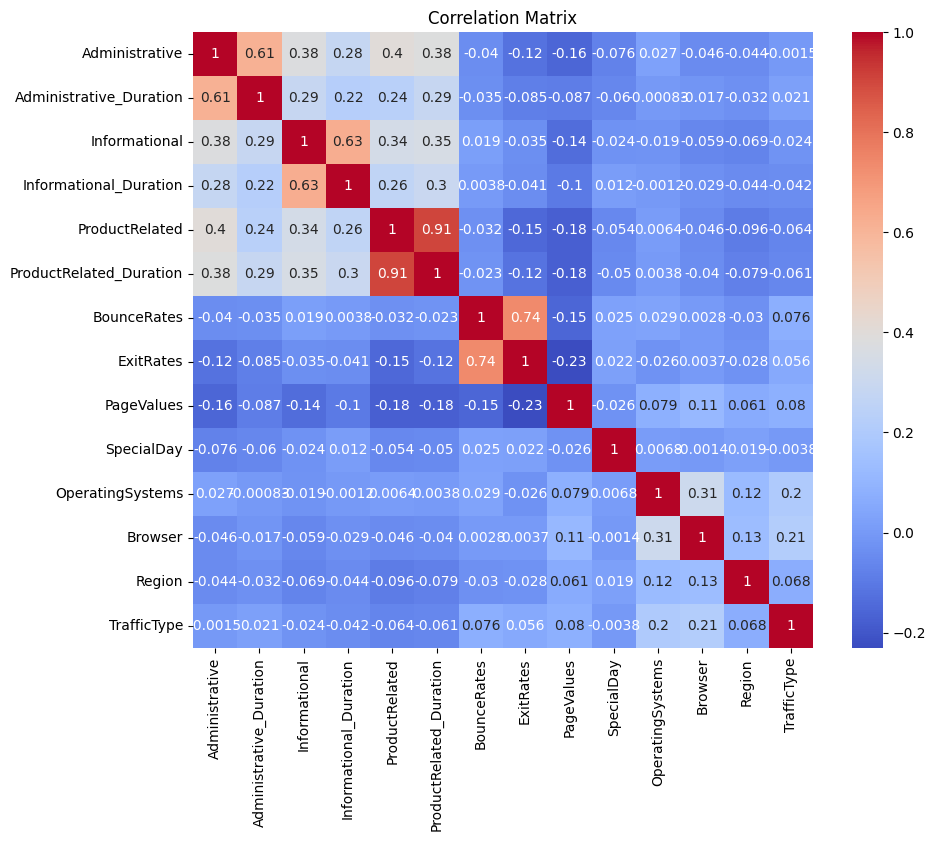

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
successful_corr = plot_data.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(successful_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [142]:
import statsmodels.api as sm

#Handling categorical values

In [143]:
# transform all features into numerical ones, by using
# the get_dummies() function and drop first
X = df_new.drop("Revenue", axis=1)
X = pd.get_dummies(X, columns=['Month', 'VisitorType', 'Weekend'], )
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True'],
      dtype='object')

In [144]:
# Administrative Page Value vs Bounce Rate
x = df_new.iloc[:, [6, 8]].values
x.shape

(12330, 2)

In [145]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [146]:
# Convert boolean columns to integer
bool_cols = X.select_dtypes(include='bool').columns  # Get all boolean columns
X[bool_cols] = X[bool_cols].astype(int)  # Convert to integer

In [147]:
print(X.shape)
print(X.columns)

(12330, 29)
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True'],
      dtype='object')


In [148]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [149]:
import numpy as np
# extract and transform target variable
y = np.where(df_new["Revenue"] == "True", 1 ,0)

#scaling numerical features.

In [150]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [ ]:
# # Encode the categorical variables
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['Month'] = le.fit_transform(df['Month'])
# df['VisitorType'] = le.fit_transform(df['VisitorType'])
# df['Weekend'] = le.fit_transform(df['Weekend'])
# # df['Revenue'] = le.fit_transform(df['Revenue'])


# # Scale the numerical features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# num_cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
#            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
# df[num_cols] = scaler.fit_transform(df[num_cols])

# # Plot the distribution of the target variable
# plt.figure(figsize=(8, 6))
# sns.histplot(df['Revenue'], kde=True)
# plt.title('Distribution of Revenue')
# plt.show()

# # Visualize the correlation matrix
# plt.figure(figsize=(12, 10))
# corr = df.corr()
# sns.heatmap(corr, annot=True, cmap='YlOrRd')
# plt.title('Correlation Matrix')
# plt.show()

In [151]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621,0.550552,-0.550552
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621,0.550552,-0.550552
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621,0.550552,-0.550552
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621,0.550552,-0.550552
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621,-1.816360,1.816360


In [152]:
X = sm.add_constant(X)
print(X.columns)

Index(['const', 'Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True'],
      dtype='object')


In [153]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   const                          12330 non-null  float64
 1   Administrative                 12330 non-null  float64
 2   Administrative_Duration        12330 non-null  float64
 3   Informational                  12330 non-null  float64
 4   Informational_Duration         12330 non-null  float64
 5   ProductRelated                 12330 non-null  float64
 6   ProductRelated_Duration        12330 non-null  float64
 7   BounceRates                    12330 non-null  float64
 8   ExitRates                      12330 non-null  float64
 9   PageValues                     12330 non-null  float64
 10  SpecialDay                     12330 non-null  float64
 11  OperatingSystems               12330 non-null  float64
 12  Browser                        12330 non-null 

#Without splitting i got 2 clusters

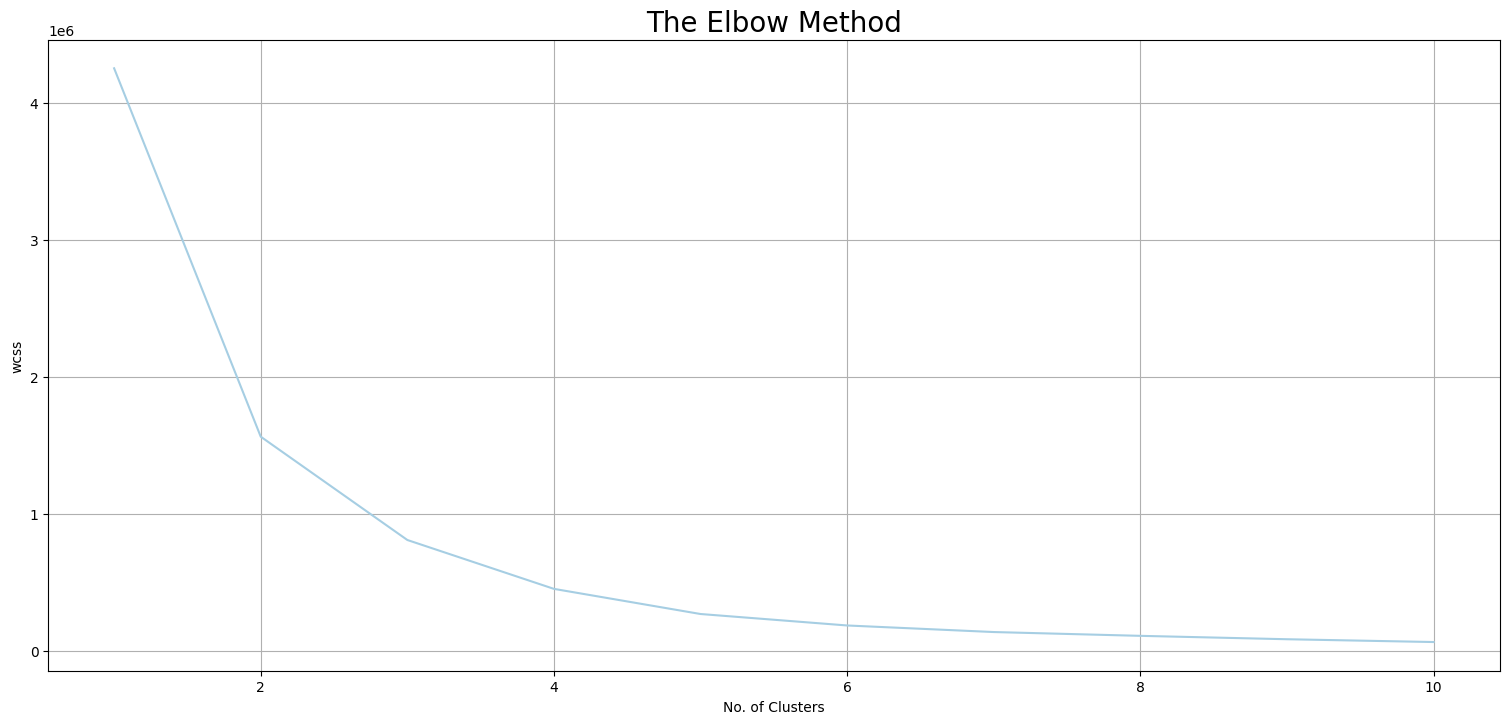

In [154]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
wcss = []
for i in range(1, 11):
    km_a = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km_a.fit(x)
    labels = km_a.labels_
    wcss.append(km_a.inertia_)

plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

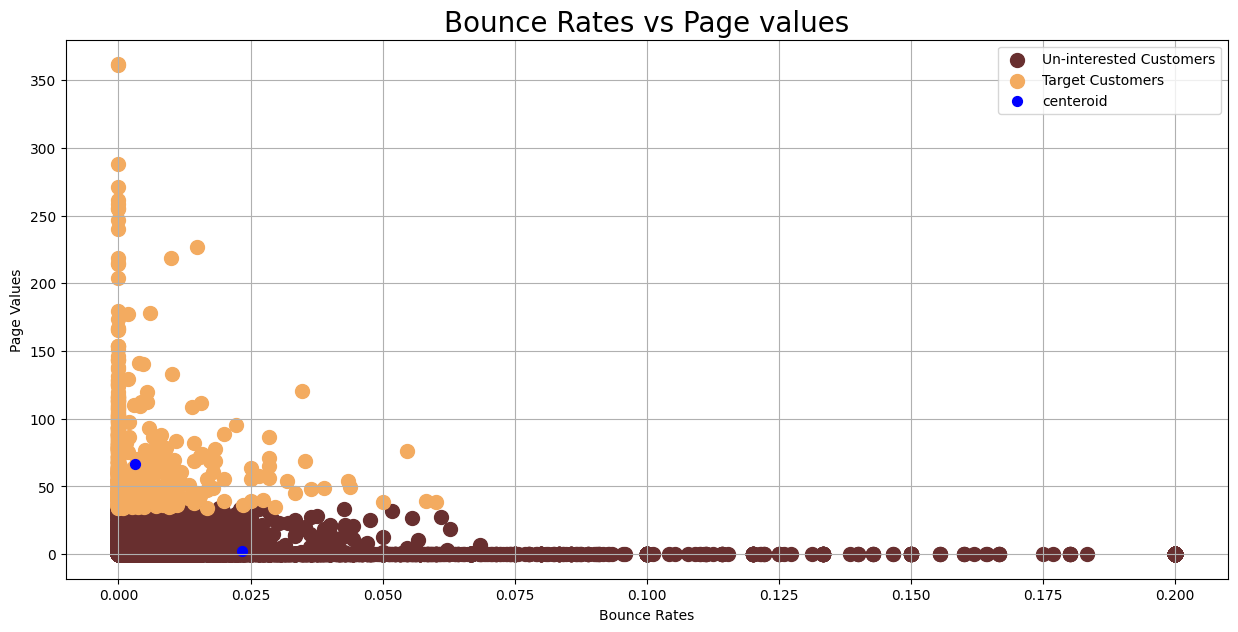

In [155]:
km_a = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km_a.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = '#682F2F', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = '#F3AB60', label = 'Target Customers')
plt.scatter(km_a.cluster_centers_[:,0], km_a.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Bounce Rates vs Page values', fontsize = 20)
plt.grid()
plt.xlabel('Bounce Rates')
plt.ylabel('Page Values')
plt.legend()
plt.show()

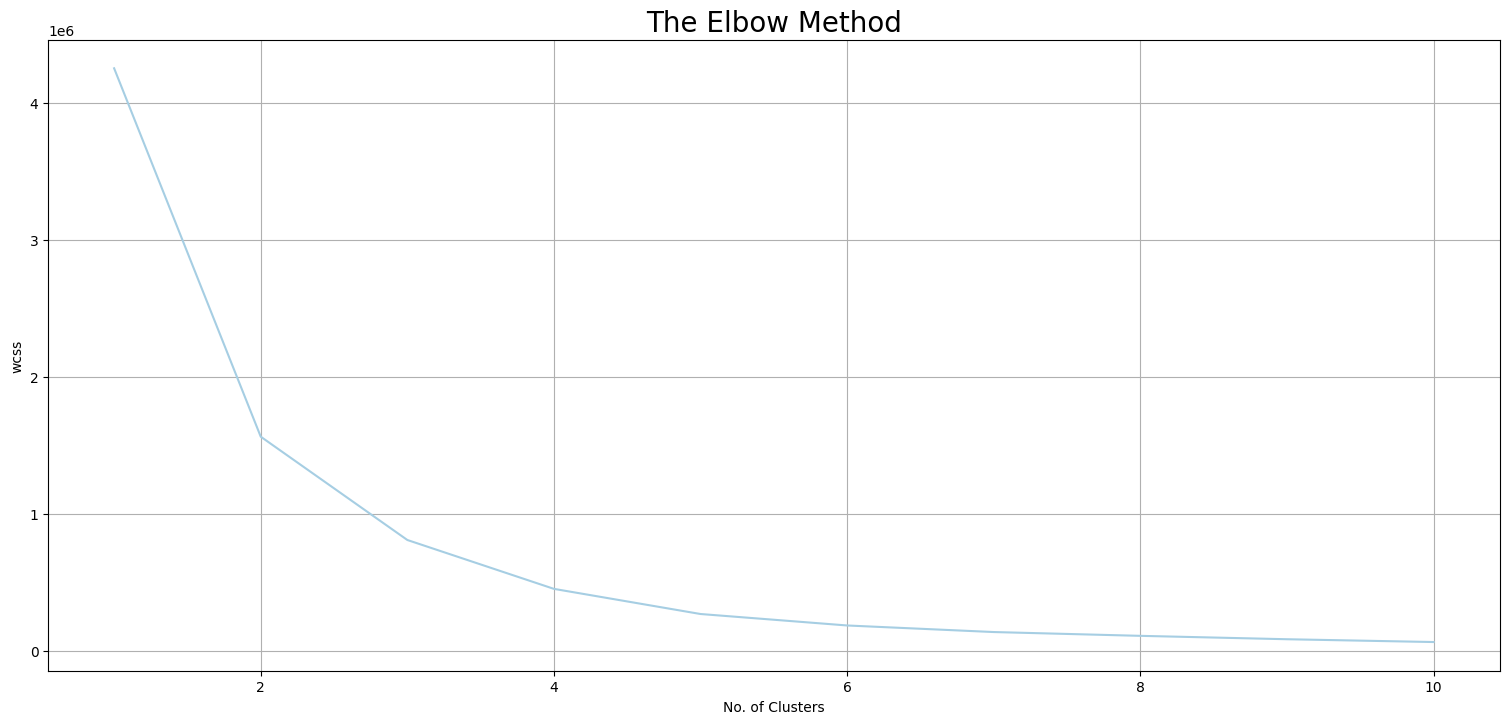

In [156]:
wcss = []
for i in range(1, 11):
    km_b = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km_b.fit(x)
    labels = km_b .labels_
    wcss.append(km_b .inertia_)

plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

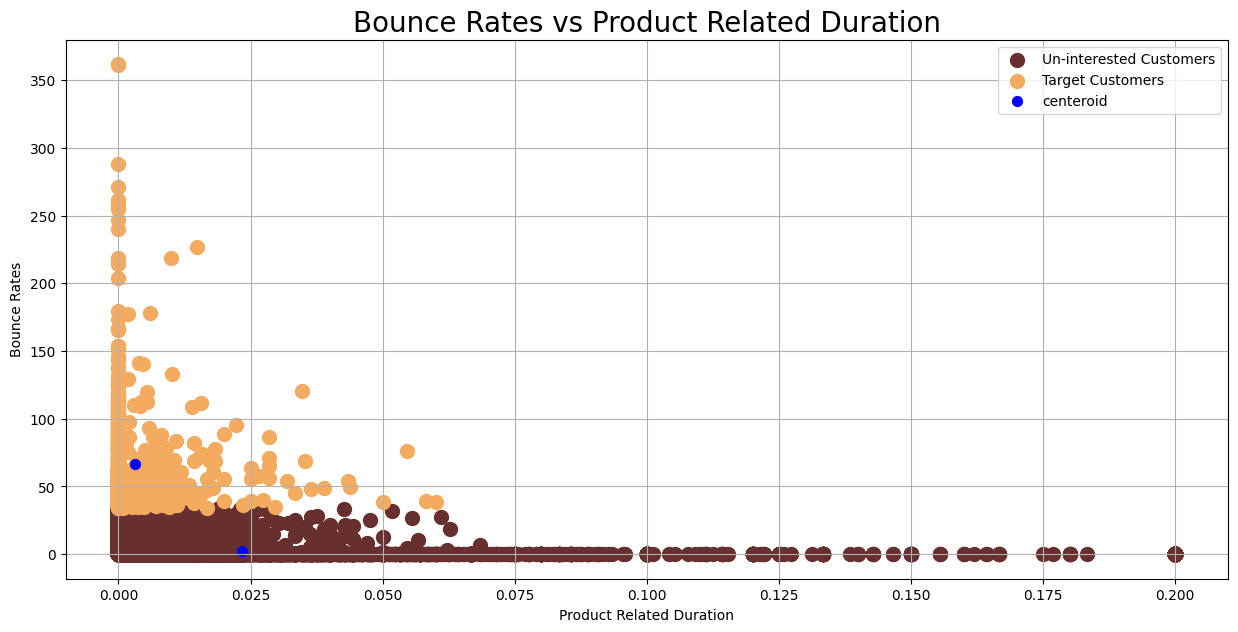

In [157]:
km_b  = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km_b .fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = '#682F2F', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = '#F3AB60', label = 'Target Customers')
plt.scatter(km_b .cluster_centers_[:,0], km_b .cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Bounce Rates vs Product Related Duration', fontsize = 20)
plt.grid()
plt.xlabel('Product Related Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()


#Train test split

In [158]:
#Create the training and test datasets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
X_train.describe()

,const,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
count,9864.0,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,...,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000
mean,1.0,-0.003717,0.001633,-0.000096,-0.002915,0.000123,0.001351,-0.010981,-0.009455,-0.003031,...,-0.001009,-0.006418,0.004396,0.000393,-0.002384,-0.001531,0.008577,-0.000519,0.011134,-0.011134
std,0.0,0.992614,1.004181,0.997458,0.987193,1.002007,1.004831,0.979008,0.984441,0.995469,...,0.999086,0.996751,1.002670,1.000919,0.994123,0.998435,1.049888,1.000576,0.992916,0.992916
min,1.0,-0.696993,-0.457191,-0.396478,-0.244931,-0.713488,-0.624348,-0.457683,-0.886371,-0.317178,...,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,-2.435336,-1.816360,-0.550552
25%,1.0,-0.696993,-0.457191,-0.396478,-0.244931,-0.556092,-0.527148,-0.457683,-0.592393,-0.317178,...,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621,0.550552,-0.550552
50%,1.0,-0.395938,-0.411935,-0.396478,-0.244931,-0.308755,-0.309473,-0.396613,-0.371910,-0.317178,...,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621,0.550552,-0.550552
75%,1.0,0.507228,0.063253,-0.396478,-0.244931,0.118464,0.144463,-0.113944,0.142551,-0.317178,...,-0.427739,1.632568,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621,0.550552,-0.550552
max,1.0,7.431499,18.769559,18.499599,17.868683,15.138577,32.806777,3.667189,3.229316,19.166337,...,2.337874,1.632568,1.764296,4.632388,5.149983,2.505720,12.002451,0.410621,0.550552,1.816360


In [160]:
X_train = sm.add_constant(X_train)
print(X_train.columns)

Index(['const', 'Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True'],
      dtype='object')


In [161]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9864 entries, 1785 to 7270
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   const                          9864 non-null   float64
 1   Administrative                 9864 non-null   float64
 2   Administrative_Duration        9864 non-null   float64
 3   Informational                  9864 non-null   float64
 4   Informational_Duration         9864 non-null   float64
 5   ProductRelated                 9864 non-null   float64
 6   ProductRelated_Duration        9864 non-null   float64
 7   BounceRates                    9864 non-null   float64
 8   ExitRates                      9864 non-null   float64
 9   PageValues                     9864 non-null   float64
 10  SpecialDay                     9864 non-null   float64
 11  OperatingSystems               9864 non-null   float64
 12  Browser                        9864 non-null   flo

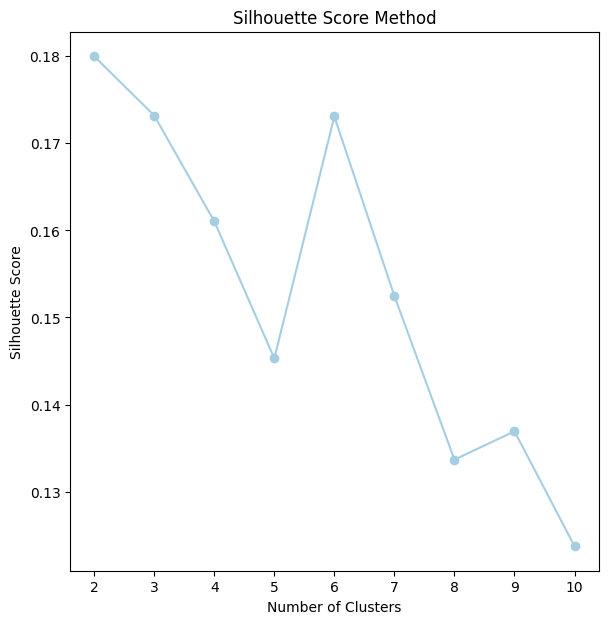

In [162]:
#Implement K-means clustering and choose the number of clusters
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

# Visualize silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

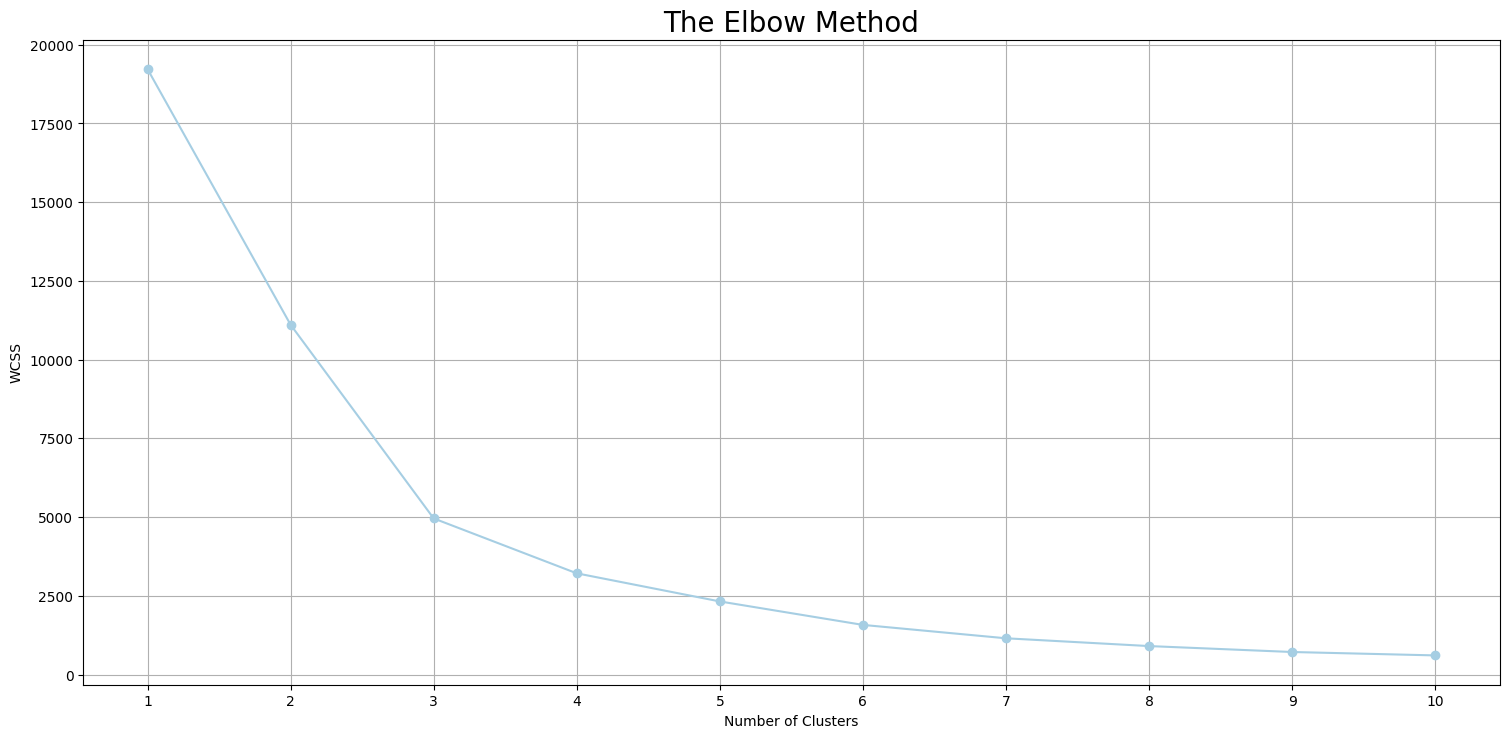

In [90]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Select the relevant features
selected_features = X_train[['BounceRates','PageValues']]  # Adjust this as necessary

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    km_1 = KMeans(n_clusters=i,
                 init='k-means++',
                 max_iter=300,
                 n_init=10,
                 random_state=0,
                 algorithm='elkan',
                 tol=0.001)
    km_1.fit(selected_features)
    wcss.append(km_1.inertia_)

# Plotting the Elbow Method for WCSS
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss, marker='o')
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()



K-means Clustering

K-means is a clustering algorithm that groups data into K clusters by assigning points to the nearest cluster center and updating those centers iteratively until stable clusters are formed

How to Choose the Number of Clusters?

Elbow Method: Find the "elbow" point in a plot of cluster variance versus K, where the curve flattens.

Silhouette Score: Evaluate how well points fit in their clusters; a higher silhouette score indicates better clustering.

In [163]:
# Choose the optimal number of clusters (say, 4 based on the elbow point)
optimal_clusters = 3

# Fit the K-Means model with the optimal number of clusters
km_1 = KMeans(n_clusters=optimal_clusters,
             init='k-means++',
             max_iter=300,
             n_init=10,
             random_state=0,
             algorithm='elkan',
             tol=0.001)
km_1.fit(selected_features)

# Predict the labels
labels = km_1.predict(selected_features)

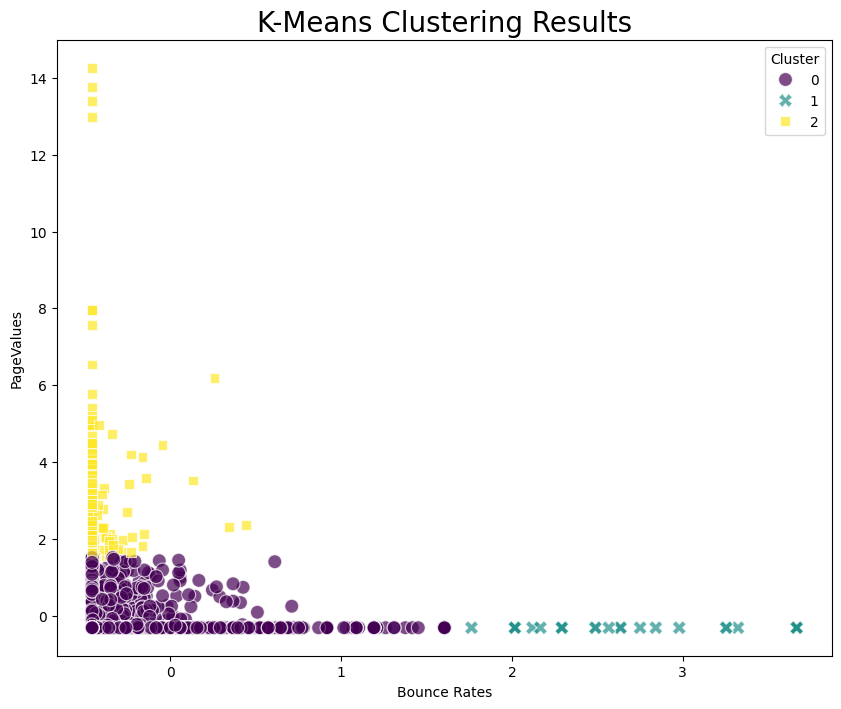

In [164]:
# Scatter plot of the clustering results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=selected_features['BounceRates'],
                y=selected_features['PageValues'],
                hue=labels,
                palette='viridis',
                style=labels,
                s=100,
                alpha=0.7)

plt.title('K-Means Clustering Results', fontsize=20)
plt.xlabel('Bounce Rates')
plt.ylabel('PageValues')
plt.legend(title='Cluster')
plt.show()

In [169]:
# Evaluate the model using silhouette score in train ing
sil_score = silhouette_score(selected_features, labels)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.8143664872396587


In [167]:
X_test = sm.add_constant(X_test)
selected_features = X_test[['BounceRates','PageValues']]
labels = km_1.predict(selected_features)
# Evaluate the model using silhouette score in testin g
sil_score = silhouette_score(selected_features, labels)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.8143664872396587


# Gaussian Mixture Model (GMM)

The Gaussian Mixture Model (GMM) is a probabilistic model that assumes data is generated from a mixture of multiple Gaussian distributions, each representing a cluster. It’s more flexible than K-means as it accounts for clusters of different shapes and sizes.

The Expectation-Maximization (EM) algorithm is used to estimate the parameters of these Gaussian distributions. The algorithm iteratively alternates between the Expectation (E-step), where the probability of each data point belonging to each cluster is calculated, and the Maximization (M-step), where the Gaussian parameters (mean, covariance, and mixing coefficients) are updated based on these probabilities. This process continues until the model converges, providing an optimal clustering solution.

GMM has converged.
Final Log Likelihood: 18.208967267319395


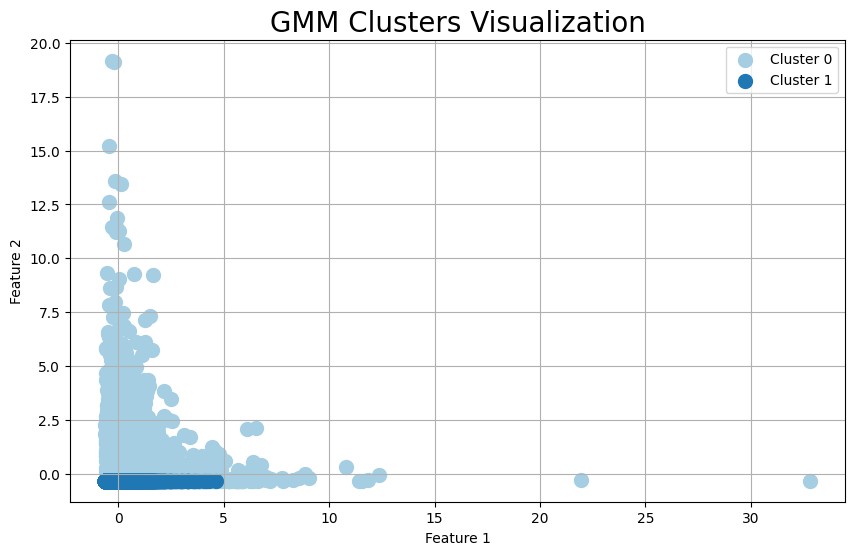

Silhouette Score for GMM: 0.065


In [174]:

# Step 6: Implement GMM using the EM algorithm.
# a. Initialize the parameters of the mixture model
optimal_k = 2  # Choose the number of clusters based on previous steps
gmm = GaussianMixture(n_components=optimal_k, random_state=42,)

# gmm.fit(X_train[numerical_cols])  # Fit only on numerical features
# # Predict clusters
# X_train['Cluster_GMM'] = gmm.predict(X_train[numerical_cols])


# c. Train the GMM model on the data
gmm.fit(X_train)

# d. Visualize the convergence of the algorithm (Not directly available in sklearn but can be inferred)
# The sklearn GMM does not provide convergence plots directly,
# But we will visualize the clusters.
# Check if the model has converged
if gmm.converged_:
    print("GMM has converged.")
    # You can print or plot the final log likelihood
    print("Final Log Likelihood:", gmm.lower_bound_)
else:
    print("GMM did not converge.")

# Predict cluster membership
X_train['Cluster_GMM'] = gmm.predict(X_train)

# e. Visualize the clusters in a scatter plot
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    plt.scatter(X_train[X_train['Cluster_GMM'] == cluster].iloc[:, 6],
                X_train[X_train['Cluster_GMM'] == cluster].iloc[:, 9],
                s=100, label=f'Cluster {cluster}')

plt.title('GMM Clusters Visualization', fontsize=20)
plt.xlabel('Feature 1')  # Replace with actual feature name
plt.ylabel('Feature 2')  # Replace with actual feature name
plt.legend()
plt.grid()
plt.show()

# Evaluate the clustering performance
gmm_silhouette = silhouette_score(X_train[numerical_cols], X_train['Cluster_GMM'])
print(f'Silhouette Score for GMM: {gmm_silhouette:.3f}')

GMM has converged.
Final Log Likelihood: 18.208967267319395


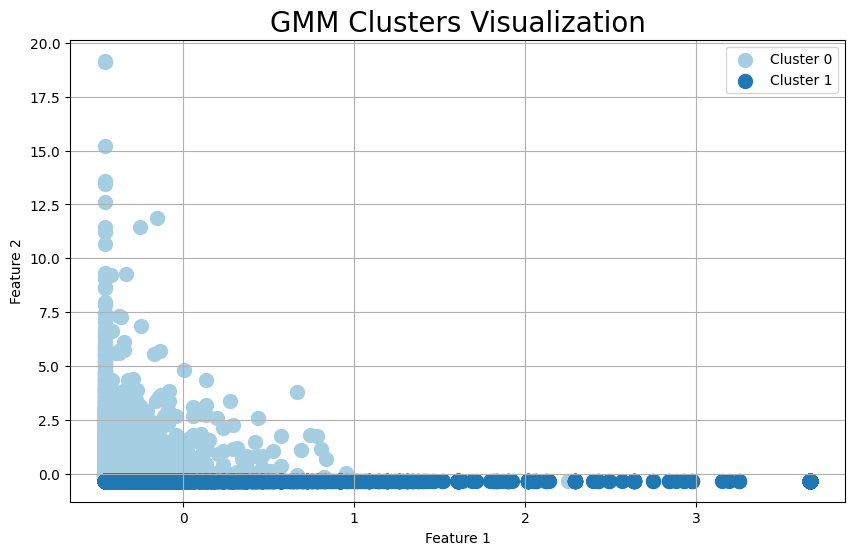

Silhouette Score for GMM: 0.065


In [177]:

# Step 6: Implement GMM using the EM algorithm.
#  Initialize the parameters of the mixture model
optimal_k = 2  # Choose the number of clusters based on previous steps
gmm2 = GaussianMixture(n_components=optimal_k, random_state=42,)

# gmm.fit(X_train[numerical_cols])  # Fit only on numerical features
# # Predict clusters
# X_train['Cluster_GMM'] = gmm.predict(X_train[numerical_cols])


# Train the GMM model on the data
gmm2.fit(X_train)

#  Visualize the convergence of the algorithm (Not directly available in sklearn but can be inferred)
# The sklearn GMM does not provide convergence plots directly,
# But we will visualize the clusters.
# Check if the model has converged
if gmm2.converged_:
    print("GMM has converged.")
    # You can print or plot the final log likelihood
    print("Final Log Likelihood:", gmm2.lower_bound_)
else:
    print("GMM did not converge.")

# Predict cluster membership
X_train['Cluster_GMM'] = gmm2.predict(X_train)

# Visualize the clusters in a scatter plot
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    plt.scatter(X_train[X_train['Cluster_GMM'] == cluster].iloc[:, 7],
                X_train[X_train['Cluster_GMM'] == cluster].iloc[:, 9],
                s=100, label=f'Cluster {cluster}')

plt.title('GMM Clusters Visualization', fontsize=20)
plt.xlabel('Feature 1')  # Replace with actual feature name
plt.ylabel('Feature 2')  # Replace with actual feature name
plt.legend()
plt.grid()
plt.show()

# Evaluate the clustering performance
gmm_silhouette = silhouette_score(X_train[numerical_cols], X_train['Cluster_GMM'])
print(f'Silhouette Score for GMM: {gmm_silhouette:.3f}')

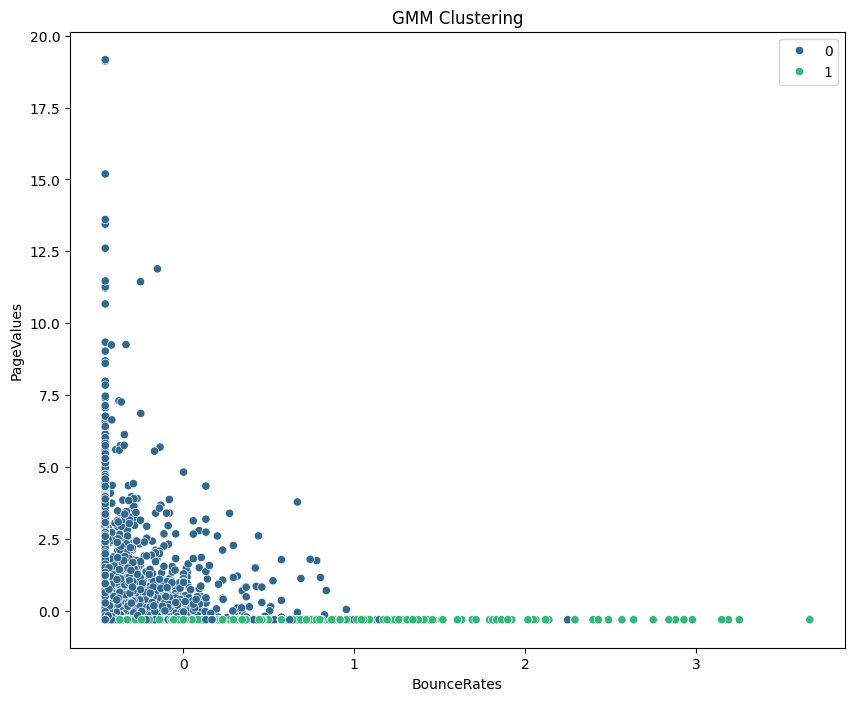

In [181]:

# Predict the clusters
gmm_labels = gmm.predict(X_train)

# Plotting the clusters for GMM
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train.iloc[:, 7], y=X_train.iloc[:, 9], hue=gmm_labels, palette='viridis')
plt.title('GMM Clustering')
plt.show()


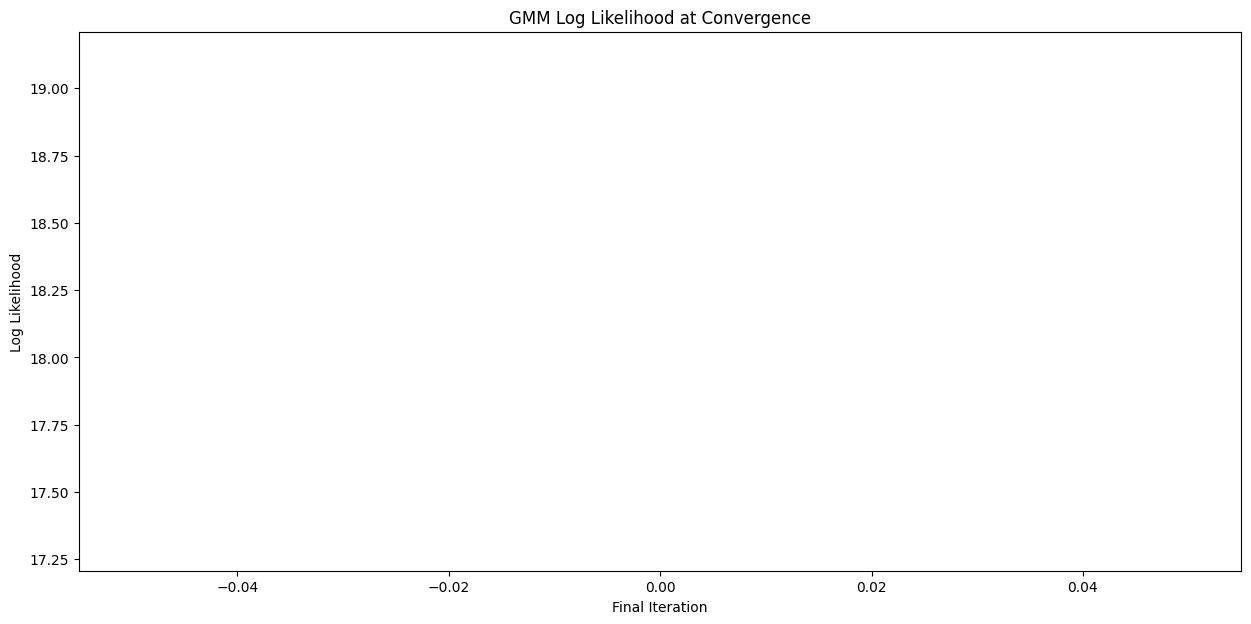

In [180]:
# Plotting the log likelihood (if you want to visualize the final value)
plt.plot([gmm2.lower_bound_])
plt.title("GMM Log Likelihood at Convergence")
plt.xlabel("Final Iteration")
plt.ylabel("Log Likelihood")
plt.show()

#Comparision

**8: Comparison of K-means and GMM**

In [184]:
# Compare clustering results using silhouette score
kmeans_silhouette = silhouette_score(X_train, kmeans.labels_)
gmm_silhouette = silhouette_score(X_train, gmm_labels)

print(f"K-means Silhouette Score: {kmeans_silhouette}")
print(f"GMM Silhouette Score: {gmm_silhouette}")


K-means Silhouette Score: 0.12323143447840464
GMM Silhouette Score: 0.07438663268602883


In [199]:
# Evaluate the model using silhouette score in training for k means
sil_score = silhouette_score(selected_features, labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.8143664872396587


**Based on Silhouette Score and the visualization, K means algorithms seems to work better than GMM**

In [194]:
X_test = sm.add_constant(X_test)
selected_features = X_test[['BounceRates','PageValues']]
labels = km_1.predict(selected_features)
# Evaluate the model using silhouette score in testin g
sil_score = silhouette_score(selected_features, labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.8143664872396587


**9: Clustering Performance Metrics**

In [206]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

# Example metrics comparison
kmeans_ari = adjusted_rand_score(y_train, kmeans.labels_)
gmm_ari = adjusted_rand_score(y_train, gmm_labels)

kmeans_ami = adjusted_mutual_info_score(y_train, kmeans.labels_)
gmm_ami = adjusted_mutual_info_score(y_train, gmm_labels) # Changed 'gmm_labels_' to 'gmm_labels'

print(f"K-means ARI: {kmeans_ari}, AMI: {kmeans_ami}")
print(f"GMM ARI: {gmm_ari}, AMI: {gmm_ami}")

K-means ARI: 0.015107033564891776, AMI: 0.023376529928580986
GMM ARI: 0.09276246979565114, AMI: 0.1417613391244839


Analyze the adjusted Rand index (ARI) and adjusted mutual information (AMI) results from your clustering comparison.

### Metrics Overview

1. **Adjusted Rand Index (ARI)**:
   - ARI measures the similarity between the true labels and the predicted cluster labels while correcting for chance. It ranges from -1 to 1.
   - A score of 1 indicates perfect agreement between the clusters and the true labels.
   - A score of 0 indicates random labeling, and negative values indicate worse than random performance.

2. **Adjusted Mutual Information (AMI)**:
   - AMI measures the agreement between the true and predicted labels, accounting for chance, similar to ARI. It also ranges from 0 to 1.
   - A score of 1 indicates perfect agreement, while a score of 0 indicates no mutual information.

#### 1. Comparison of K-means and GMM:
- If **K-means ARI** and **AMI** scores are significantly higher than those of GMM, it suggests that K-means has captured the underlying structure of the data better in this case.
- Conversely, if GMM shows higher scores, it indicates that GMM might be better suited for the data, especially in cases where cluster shapes are more complex.

#### 2. Score Interpretation:
- **High Scores** (close to 1):
  - Indicates that the clusters formed by either algorithm closely align with the true labels, suggesting good clustering performance.
- **Moderate Scores** (around 0.5):
  - Suggests that the clusters are somewhat aligned but may still misclassify some instances.
- **Low Scores** (close to 0 or negative):
  - Indicates poor clustering performance and that the algorithm may not be suitable for the dataset.

### Conclusion:
- The analysis of ARI and AMI helps in identifying which clustering method better represents the underlying data structure.
- Consider the context of data and the characteristics of each clustering algorithm's performance based on these metrics.

In [220]:
# Example metrics comparison
kmeans_ari = adjusted_rand_score(y_train, kmeans.labels_)
gmm_ari = adjusted_rand_score(y_train, gmm_labels)

kmeans_ami = adjusted_mutual_info_score(y_train, kmeans.labels_)
gmm_ami = adjusted_mutual_info_score(y_train, gmm_labels) # Changed 'gmm_labels_' to 'gmm_labels'

print(f"K-means ARI: {kmeans_ari}, AMI: {kmeans_ami}")
print(f"GMM ARI: {gmm_ari}, AMI: {gmm_ami}")

K-means ARI: 0.015107033564891776, AMI: 0.023376529928580986
GMM ARI: 0.09276246979565114, AMI: 0.1417613391244839


In [219]:
X_test = sm.add_constant(X_test)
selected_features = X_test[['BounceRates','PageValues']]
labels = km_1.predict(selected_features)
# Evaluate the model using silhouette score in testin g
sil_score = silhouette_score(selected_features, labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.8143664872396587


**10: Implementing Other Clustering Algorithms**

DBSCAN and Agglomerative Clustering

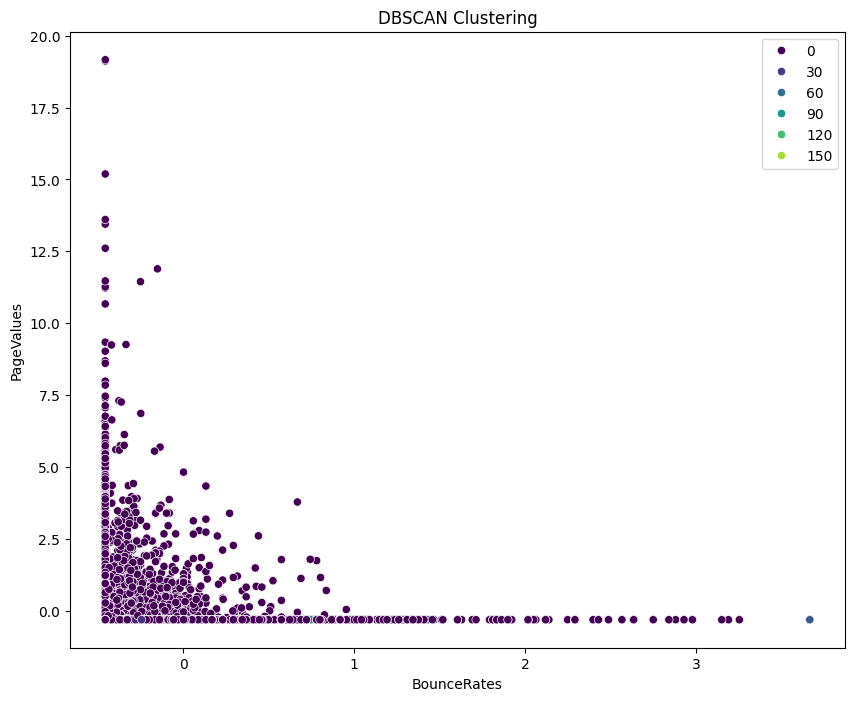

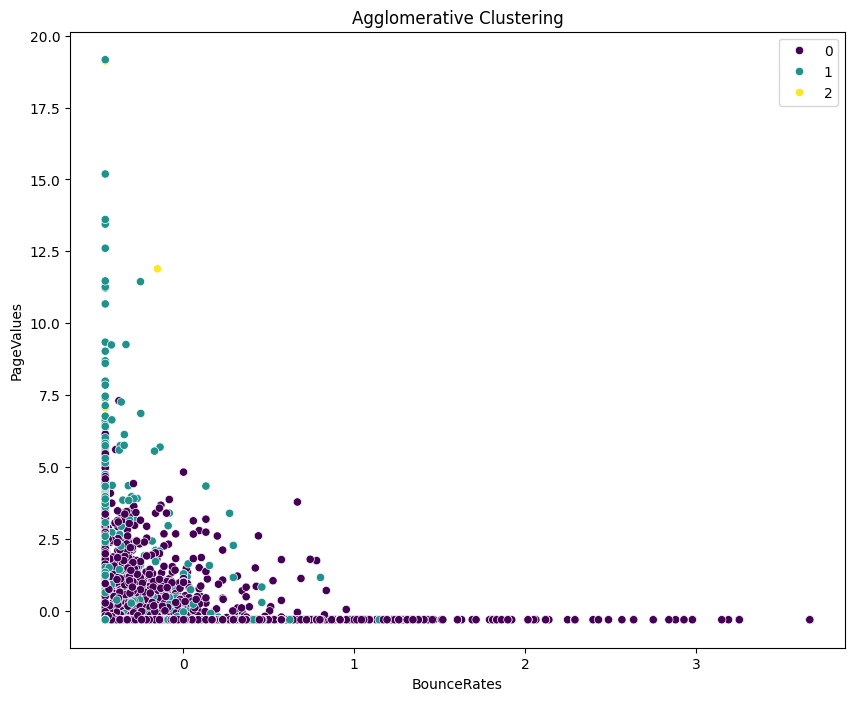

DBSCAN Silhouette Score: -0.469150483042394
Agglomerative Clustering Silhouette Score: 0.13425189521173278


In [226]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_train)

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
agg_labels = agg_clustering.fit_predict(X_train)

# Visualize DBSCAN Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train.iloc[:, 7], y=X_train.iloc[:, 9], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

# Visualize Agglomerative Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train.iloc[:, 7], y=X_train.iloc[:, 9], hue=agg_labels, palette='viridis')
plt.title('Agglomerative Clustering')
plt.show()

# Compare the results using silhouette score
dbscan_silhouette = silhouette_score(X_train, dbscan_labels)
agg_silhouette = silhouette_score(X_train, agg_labels)

print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette}")


#Overall Kmeans seams to perform better than other clustering algorithms for this problem in this data set